In [564]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.tree import export_graphviz
import graphviz


import statsmodels.formula.api as smf
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

##
import matplotlib
# matplotlib.matplotlib_fname()
import matplotlib.font_manager as fm
matplotlib.font_manager._rebuild()
[f.name for f in matplotlib.font_manager.fontManager.ttflist]
    # #matplotlib.rc('font',family='NanumMyeongjoBold')
matplotlib.rc('font',family='NanumGothic')

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

#주성분 분석
from sklearn.decomposition import PCA
#회귀분석
import statsmodels.api as sm


import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import scipy.stats as stats

import numpy as np
from scipy import stats
import scipy.stats
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from scipy.stats import shapiro

In [565]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('font', size=14, family='NanumGothic')
# plt.rc('axes', titlesize=14, labelsize=14)
# plt.rc('xtick', labelsize=14)
# plt.rc('xlabel', titlesize=14)
# plt.rc('ytick', labelsize=14)
# plt.rc('ylabel', titlesize=14)
# plt.rc('legend', fontsize=14)
# plt.rc('figure', titlesize=16)
plt.rcParams['axes.unicode_minus'] = False
plt.style.use('ggplot')

def add_comma(val):
    reverse = list(str(int(val))[::-1])
    
    if len(reverse) < 4:
        return str(val)
    else:
        cnt = 0
        for i in range(3, len(reverse), 3):
            reverse.insert(i+cnt, ',')
            cnt += 1
    
    return ''.join(reverse)[::-1]

In [566]:
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics.cluster import silhouette_score
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.tree import export_graphviz
import graphviz
from sklearn.model_selection import cross_val_score

In [567]:
plt.rc('font', family='NanumGothic', size=14)
plt.rcParams['axes.unicode_minus'] = False
plt.style.use('ggplot')

In [568]:
member = pd.read_csv('member_data_preprocessed.csv')
product = pd.read_csv('product_preprocessed.csv')

# 전처리

In [569]:
X = pd.get_dummies(member.drop(['회원번호', '주소', '연령대', '구', '총구매금액', 'Gold_member'], axis=1))

In [570]:
minmax = MinMaxScaler()

In [571]:
feature = minmax.fit_transform(X)

# 군집특성 파악

## k군집

In [572]:
km = KMeans(n_clusters=6, n_jobs=-1, random_state=1234)
km.fit(feature)
member['k군집'] = km.labels_

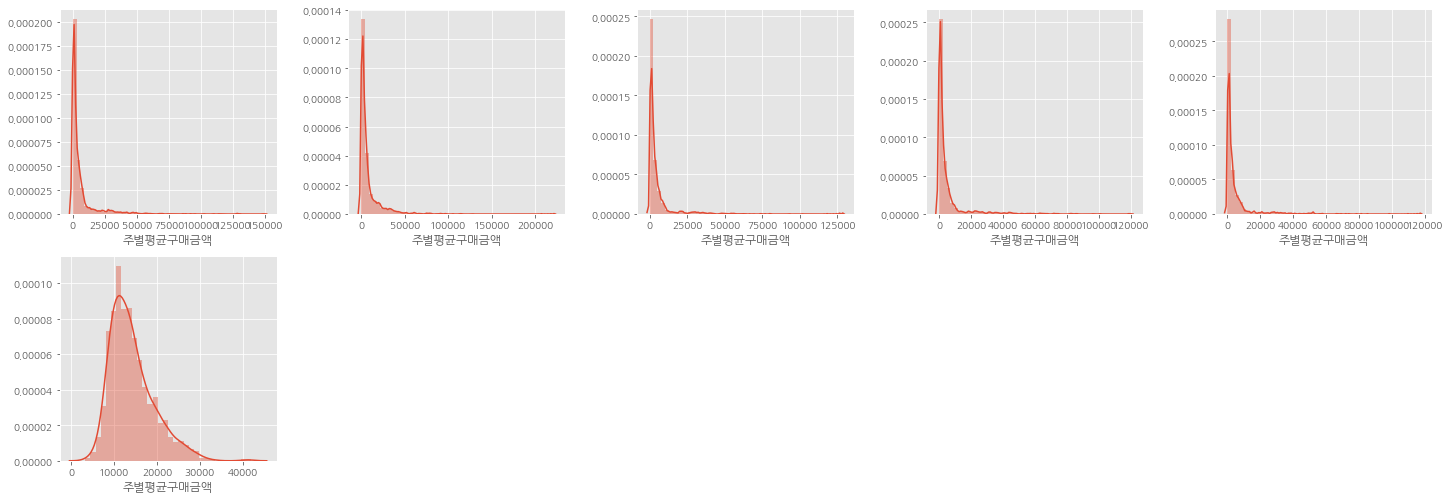

In [573]:
plt.figure(figsize=(20,10))
for i in range(6):
    sns.distplot(member.loc[member['k군집'] == i, '주별평균구매금액'], ax=plt.subplot(3, 5, i+1), label=i)
plt.tight_layout()

# VIP 분류 모델 생성

## k군집

In [574]:
member['VIP'] = 0

In [575]:
member.loc[member['k군집'] == 5, 'VIP'] = 1

In [576]:
member['VIP'].value_counts()

0    10499
1     1043
Name: VIP, dtype: int64

In [577]:
mem_vip = member.loc[member["VIP"]==1]

In [578]:
mem_non_vip = member.loc[member["VIP"]==0]

In [579]:
mem_non_vip = mem_non_vip.sample(n=len(mem_vip), random_state=1234)

In [580]:
total_mem = pd.concat([mem_vip,mem_non_vip],axis=0)

In [581]:
X_raw = pd.get_dummies(member.drop(['회원번호', '조합원상태', '주소', '배송서비스신청여부', 'Gold_member', '연령대', '구', '동', 'VIP', 'k군집', '총구매금액', '방문횟수', '첫방문일','최종방문일'], axis=1))
y_raw = member['VIP']

In [582]:
X = pd.get_dummies(total_mem.drop(['회원번호', '조합원상태', '주소', '배송서비스신청여부', 'Gold_member', '연령대', '구', '동', 'VIP', 'k군집', '총구매금액', '방문횟수', '첫방문일','최종방문일'], axis=1))
y = total_mem['VIP']

In [583]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1234)

In [584]:
dt = DecisionTreeClassifier(random_state=1234, max_depth=5)
rf = RandomForestClassifier(random_state=1234, n_jobs=-1)
gb = GradientBoostingClassifier(random_state=1234)

In [585]:
dt.fit(x_train, y_train)
rf.fit(x_train, y_train)
gb.fit(x_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1234, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [544]:
print(f'의사결정나무 점수 : {dt.score(X_raw, y_raw).round(3)}\t 교차검증 점수 : {cross_val_score(dt, X_raw, y_raw).mean().round(3)}')
print(f'랜덤포레스트 점수 : {rf.score(X_raw, y_raw).round(3)}\t 교차검증 점수 : {cross_val_score(rf, X_raw, y_raw).mean().round(3)}')
print(f'그래디언트부스팅 점수 : {gb.score(X_raw, y_raw).round(3)}\t 교차검증 점수 : {cross_val_score(gb, X_raw, y_raw).mean().round(3)}')

의사결정나무 점수 : 0.91	 교차검증 점수 : 0.949
랜덤포레스트 점수 : 0.925	 교차검증 점수 : 0.956
그래디언트부스팅 점수 : 0.925	 교차검증 점수 : 0.957


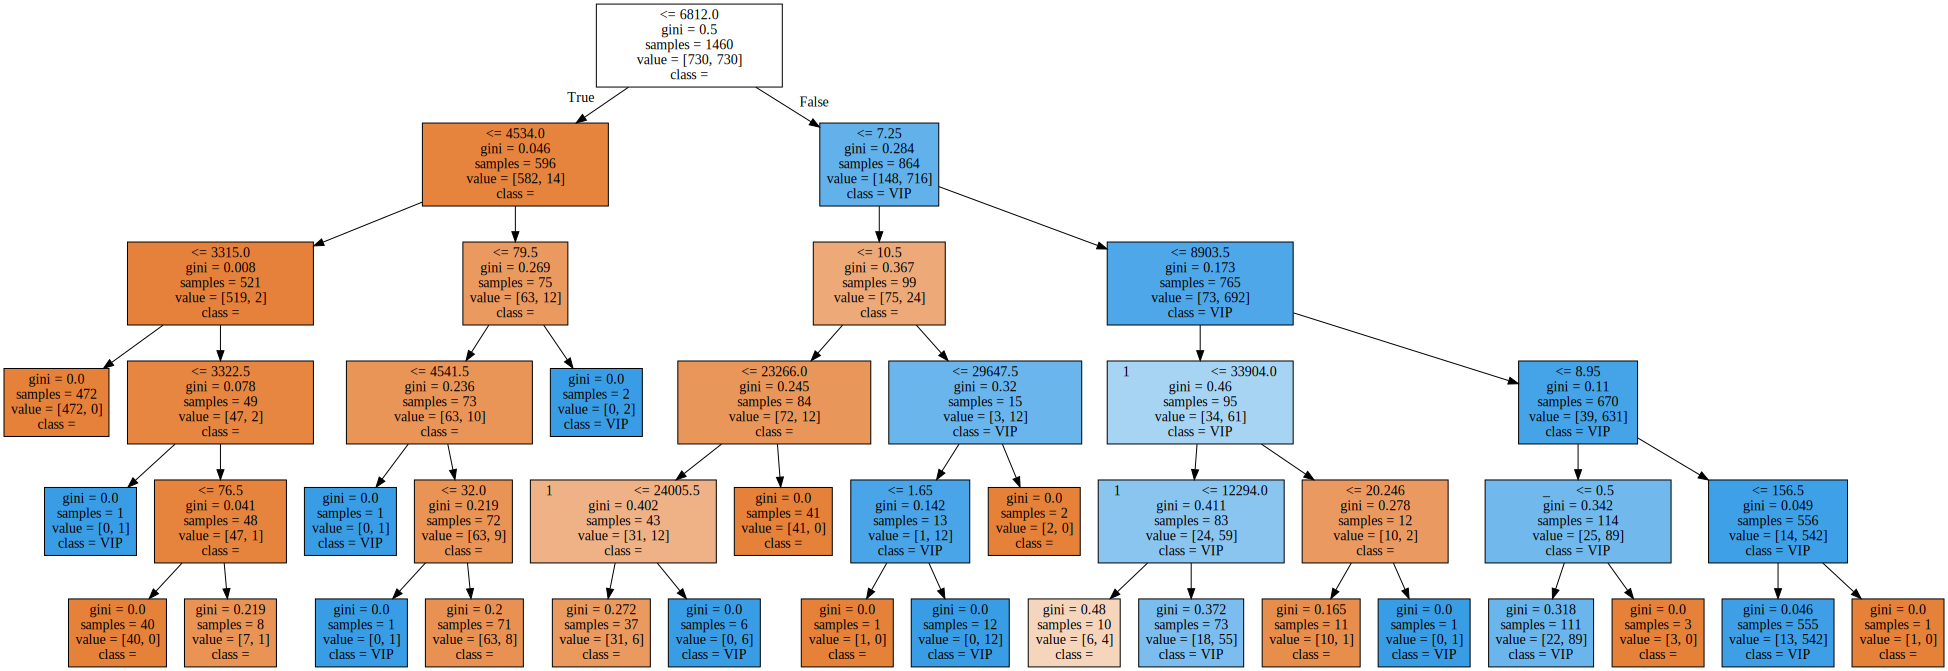

In [545]:
v_feature_name = x_train.columns
export_graphviz(dt, out_file='tree_low.dot', class_names=['일반', 'VIP'], feature_names=v_feature_name, impurity=True, filled=True)
with open('tree_low.dot') as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

In [491]:
memberr=member
# 군집1: 2251 , 군집2: 2597, 군집3: 1968, 군집4: 1815, 군집5: 1043

# 5군집만 봅시다

In [618]:
member=member[member.k군집==5]
member

,회원번호,조합원상태,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,연령대,구,...,1회평균구매금액,주별평균구매금액,첫방문일,최종방문일,미방문기간,방문주기,최대매출매장,구매증감율,k군집,VIP
4,1000281920,정상회원,수지구-풍덕천동,여,42,신청,미수신,normal,35 ~ 44,수지구,...,22591,14376,2,279,25,9.9,매장C,-0.305,5,1
26,1002102656,정상회원,수지구-동천동,여,59,신청,미수신,normal,55 ~ 64,수지구,...,18332,11249,11,299,5,10.7,매장A,-0.543,5,1
44,1005389632,정상회원,수지구-동천동,여,54,신청,미수신,normal,45 ~ 54,수지구,...,29015,11869,20,272,32,14.0,매장A,-0.675,5,1
63,1006319488,정상회원,수지구-풍덕천동,여,46,신청,미수신,normal,45 ~ 54,수지구,...,12575,8573,3,301,3,9.9,매장C,0.142,5,1
74,1007015488,정상회원,기흥구-보정동,여,54,신청,미수신,normal,45 ~ 54,기흥구,...,23980,12535,4,304,0,13.0,매장B,-0.256,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11475,993041664,정상회원,수지구-상현동,여,41,신청,미수신,normal,35 ~ 44,수지구,...,42647,12600,13,293,11,21.5,매장B,0.016,5,1
11482,994732480,정상회원,수지구-풍덕천동,여,39,신청,미수신,normal,35 ~ 44,수지구,...,24043,11475,8,294,10,13.6,매장C,0.472,5,1
11497,997321600,정상회원,기흥구-보정동,여,54,신청,미수신,normal,45 ~ 54,기흥구,...,19709,8958,15,276,28,13.0,매장B,0.233,5,1
11516,998784128,정상회원,수지구-동천동,여,45,신청,미수신,normal,35 ~ 44,수지구,...,14303,10727,3,292,12,8.8,매장A,-0.112,5,1


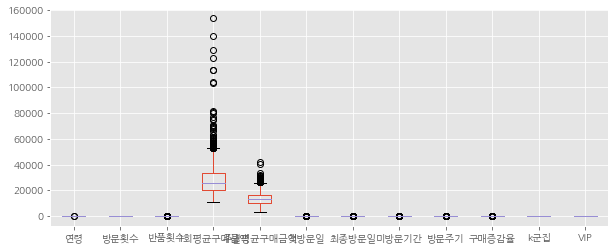

In [587]:
df_raw=member.drop(['회원번호','총구매금액'], axis=1)
df_raw.boxplot(figsize=(10,4))

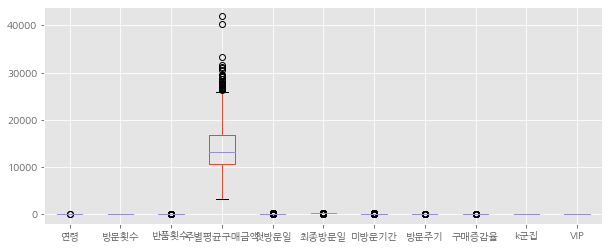

In [588]:
df_raw=member.drop(['회원번호','총구매금액','1회평균구매금액'], axis=1)
df_raw.boxplot(figsize=(10,4)) 

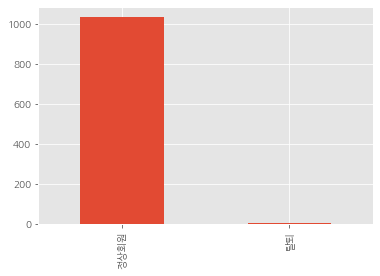

In [589]:
df_count=member["조합원상태"].value_counts()
df_count.plot.bar()

In [590]:
member["조합원상태"].value_counts()

정상회원    1036
탈퇴         7
Name: 조합원상태, dtype: int64

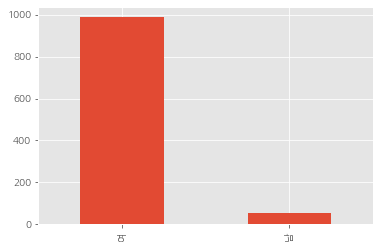

In [619]:
df_count=member["성별"].value_counts()
df_count.plot.bar()

In [620]:
df_count

여    987
남     56
Name: 성별, dtype: int64

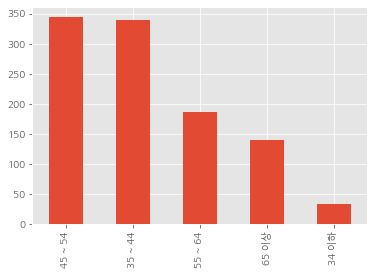

In [596]:
df_count=member["연령대"].value_counts()
df_count.plot.bar()

In [597]:
df_count

45 ~ 54    344
35 ~ 44    340
55 ~ 64    186
65 이상      140
34 이하       33
Name: 연령대, dtype: int64

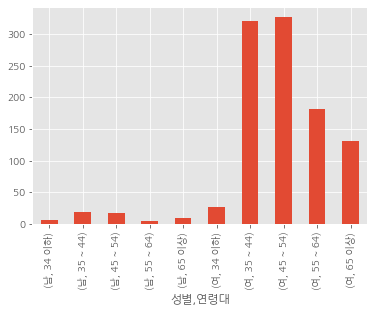

In [592]:
df_groupby_total=member.groupby(['성별','연령대'], \
                                   as_index=False).size()

df_groupby_total.plot.bar()

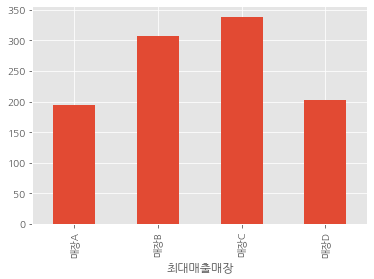

In [549]:
df_groupby_total=member.groupby(['최대매출매장'], \
                                   as_index=False).size()

df_groupby_total.plot.bar()

In [550]:
df_groupby_total

최대매출매장
매장A    194
매장B    307
매장C    339
매장D    203
dtype: int64

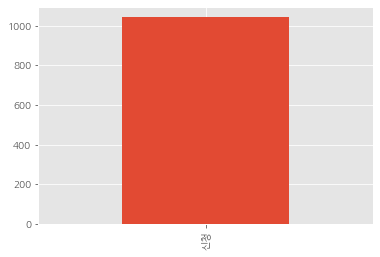

In [598]:
df_count=member["배송서비스신청여부"].value_counts()
df_count.plot.bar()

In [599]:
df_count

신청    1043
Name: 배송서비스신청여부, dtype: int64

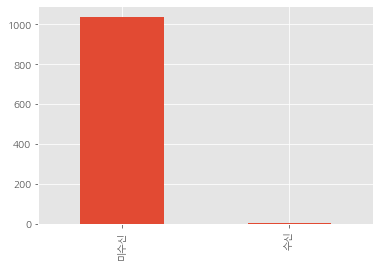

In [553]:
df_count=member["모바일알람여부"].value_counts()
df_count.plot.bar()

In [554]:
df_count

미수신    1038
수신        5
Name: 모바일알람여부, dtype: int64

### *all 신청

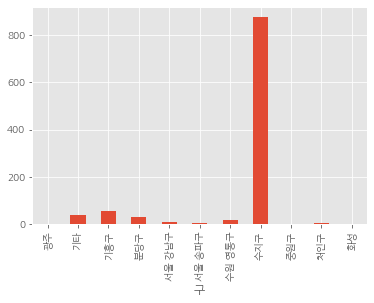

In [35]:
df_groupby_total=member.groupby(['구'], \
                                   as_index=False).size()

df_groupby_total.plot.bar()

### 연령대별 회원수

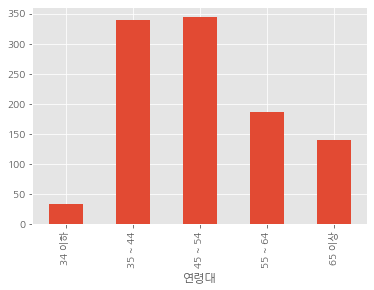

In [101]:
df_groupby_total=member.groupby(['연령대'], \
                                   as_index=False).size()

df_groupby_total.plot.bar()

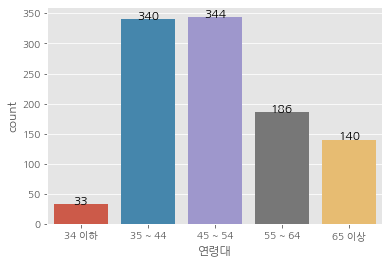

In [59]:
ax = sns.countplot(x='연령대', data=member, order=['34 이하', '35 ~ 44', '45 ~ 54', '55 ~ 64', '65 이상'])
for p in ax.patches:
    ax.text(s = add_comma(p.get_height()), x = p.get_x()+p.get_width()/2, y = p.get_height(), ha='center', fontsize=12)

### 연령대별 총구매금액

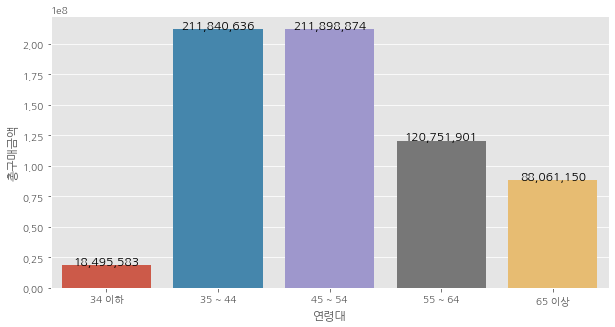

In [61]:
age_price_sum = pd.pivot_table(index='연령대', values='총구매금액', aggfunc='sum', data=member).reset_index()

plt.figure(figsize=(10,5))

ax = sns.barplot(x='연령대', y='총구매금액', data=age_price_sum, order=['34 이하', '35 ~ 44', '45 ~ 54', '55 ~ 64', '65 이상'])
for p in ax.patches:
    ax.text(s = add_comma(p.get_height()), x = p.get_x()+p.get_width()/2, y = p.get_height(), ha='center', fontsize=12)

In [62]:
pd.pivot_table(index='연령대', values='방문횟수', aggfunc='mean', data=member).reset_index()

,연령대,방문횟수
0,34 이하,22.666667
1,35 ~ 44,23.405882
2,45 ~ 54,22.511628
3,55 ~ 64,23.188172
4,65 이상,23.085714


### 연령대별 1회평균 구매금액

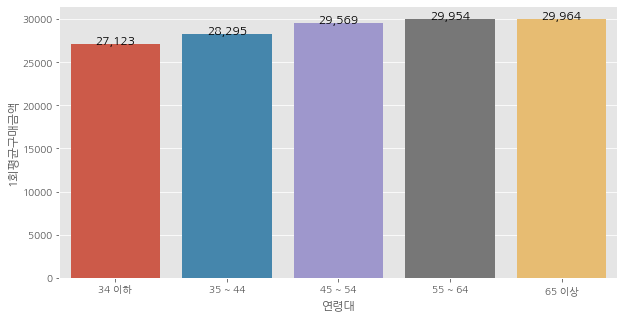

In [63]:
age_price1 = pd.pivot_table(index='연령대', values='1회평균구매금액', aggfunc='mean', data=member).reset_index()

plt.figure(figsize=(10,5))

ax = sns.barplot(x='연령대', y='1회평균구매금액', data=age_price1, order=['34 이하', '35 ~ 44', '45 ~ 54', '55 ~ 64', '65 이상'])
for p in ax.patches:
    ax.text(s = add_comma(p.get_height()), x = p.get_x()+p.get_width()/2, y = p.get_height(), ha='center', fontsize=12)

#### 연령대별 분석

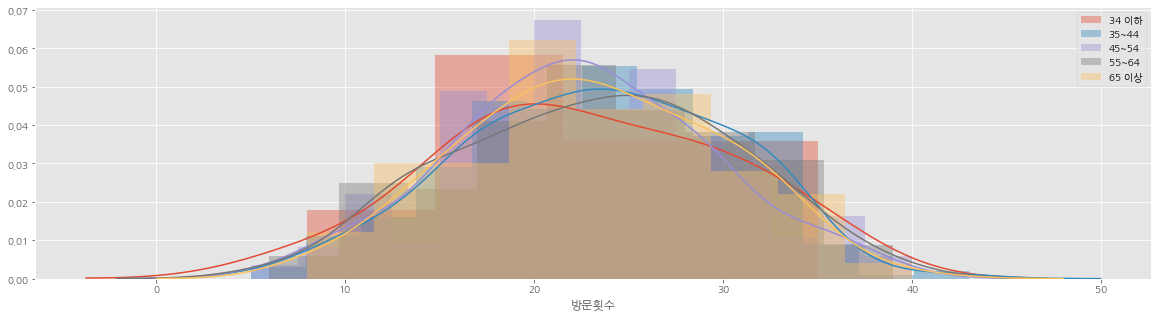

In [64]:
plt.figure(figsize=(20,5))
sns.distplot(member.loc[member['연령대'] == '34 이하', '방문횟수'], label='34 이하')
sns.distplot(member.loc[member['연령대'] == '35 ~ 44', '방문횟수'], label='35~44')
sns.distplot(member.loc[member['연령대'] == '45 ~ 54', '방문횟수'], label='45~54')
sns.distplot(member.loc[member['연령대'] == '55 ~ 64', '방문횟수'], label='55~64')
sns.distplot(member.loc[member['연령대'] == '65 이상', '방문횟수'], label='65 이상')
plt.legend()
plt.show()

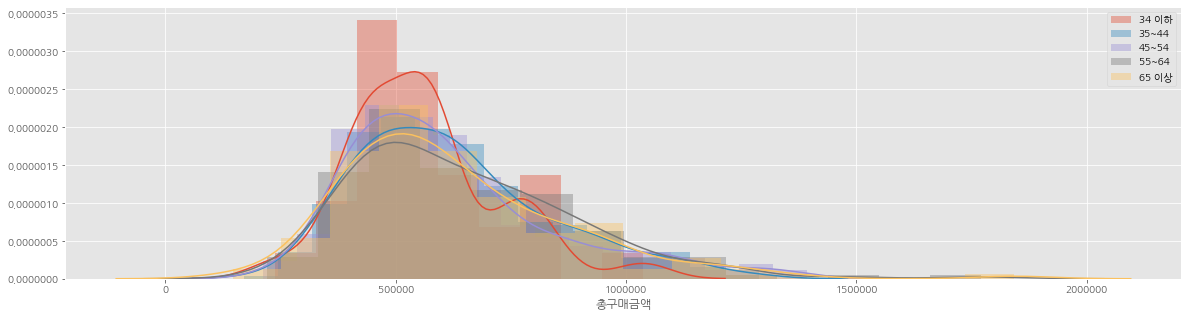

In [65]:
plt.figure(figsize=(20,5))
sns.distplot(member.loc[member['연령대'] == '34 이하', '총구매금액'], label='34 이하')
sns.distplot(member.loc[member['연령대'] == '35 ~ 44', '총구매금액'], label='35~44')
sns.distplot(member.loc[member['연령대'] == '45 ~ 54', '총구매금액'], label='45~54')
sns.distplot(member.loc[member['연령대'] == '55 ~ 64', '총구매금액'], label='55~64')
sns.distplot(member.loc[member['연령대'] == '65 이상', '총구매금액'], label='65 이상')
plt.legend()
plt.show()

In [126]:
mem=member

### * 총구매금액이 750000이상일 때 35세 이상 연령의 분포가 더 많다.

In [142]:
result1=mem[mem.총구매금액>80000]
result1['총구매금액']

4        632554
26       494971
44       522272
63       377240
74       551542
          ...  
11475    554417
11482    504909
11497    394180
11516    472000
11540    641334
Name: 총구매금액, Length: 1043, dtype: int64

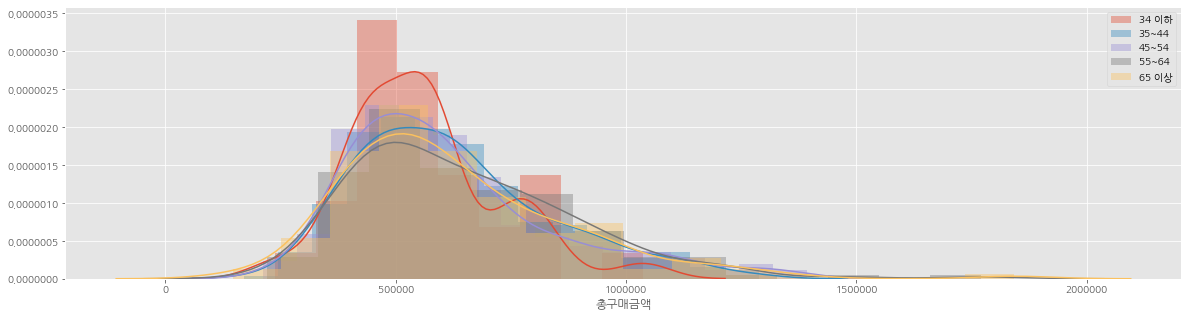

In [143]:
plt.figure(figsize=(20,5))
sns.distplot(result1.loc[result1['연령대'] == '34 이하', '총구매금액'], label='34 이하')
sns.distplot(result1.loc[result1['연령대'] == '35 ~ 44', '총구매금액'], label='35~44')
sns.distplot(result1.loc[result1['연령대'] == '45 ~ 54', '총구매금액'], label='45~54')
sns.distplot(result1.loc[result1['연령대'] == '55 ~ 64', '총구매금액'], label='55~64')
sns.distplot(result1.loc[result1['연령대'] == '65 이상', '총구매금액'], label='65 이상')
plt.legend()
plt.show()

In [153]:
t_result = stats.ttest_ind(result11['총구매금액'], result14['총구매금액'], equal_var=True)
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

print("2-Sample t-test")
print("t 통계량 : {}".format(t))
print("p-value : {}".format(p))

2-Sample t-test
t 통계량 : -2.036
p-value : 0.043


### *34이하와 65이상의 구매력에 차이가 있다.

In [174]:
신규고객증가율, result11=result1[result1.연령대=='34 이하']
result12=result1[result1.연령대=='35 ~ 44']
result13=result1[result1.연령대=='45 ~ 54']
result14=result1[result1.연령대=='55 ~ 64']
result15=result1[result1.연령대=='65 이상']

result12=result12[['총구매금액']]
result13=result13[['총구매금액']]
result14=result14[['총구매금액']]
result14
# result15=result12+result13+result14

,총구매금액
26,494971
210,470662
345,700293
392,851873
485,945207
...,...
11040,407483
11049,479525
11118,429767
11262,447390


In [170]:
result15

4       NaN
26      NaN
44      NaN
63      NaN
74      NaN
         ..
11475   NaN
11482   NaN
11497   NaN
11516   NaN
11540   NaN
Name: 총구매금액, Length: 870, dtype: float64

In [158]:
t_result = stats.ttest_ind(result11['총구매금액'], result15['총구매금액'], equal_var=True)
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

print("2-Sample t-test")
print("t 통계량 : {}".format(t))
print("p-value : {}".format(p))

2-Sample t-test
t 통계량 : nan
p-value : nan


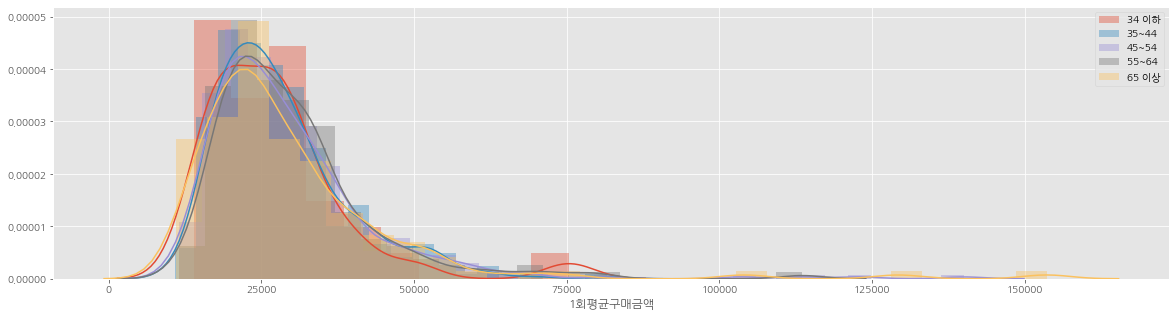

In [66]:
plt.figure(figsize=(20,5))
sns.distplot(member.loc[member['연령대'] == '34 이하', '1회평균구매금액'], label='34 이하')
sns.distplot(member.loc[member['연령대'] == '35 ~ 44', '1회평균구매금액'], label='35~44')
sns.distplot(member.loc[member['연령대'] == '45 ~ 54', '1회평균구매금액'], label='45~54')
sns.distplot(member.loc[member['연령대'] == '55 ~ 64', '1회평균구매금액'], label='55~64')
sns.distplot(member.loc[member['연령대'] == '65 이상', '1회평균구매금액'], label='65 이상')
plt.legend()
plt.show()

### 조합원상태별 회원수

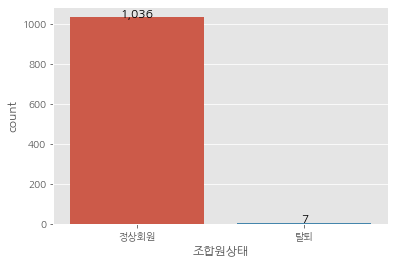

In [67]:
ax = sns.countplot(x='조합원상태', data=member)
for p in ax.patches:
    ax.text(s = add_comma(p.get_height()), x = p.get_x()+p.get_width()/2, y = p.get_height(), ha='center', fontsize=12)

### 탈퇴회원 분석

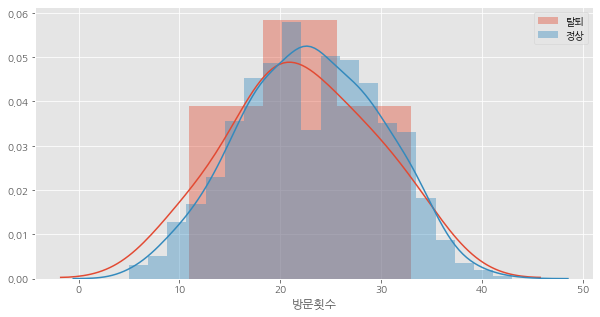

In [68]:
plt.figure(figsize=(10,5))
sns.distplot(member.loc[member['조합원상태'] == '탈퇴', '방문횟수'], label='탈퇴')
sns.distplot(member.loc[member['조합원상태'] != '탈퇴', '방문횟수'], label='정상')
plt.legend()
plt.show()

In [180]:
result1=mem[mem.조합원상태=='정상회원']
result2=mem[mem.조합원상태=='탈퇴']

t_result = stats.ttest_ind(result1['총구매금액'], result2['총구매금액'], equal_var=True)
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

print("2-Sample t-test")
print("t 통계량 : {}".format(t))
print("p-value : {}".format(p))

2-Sample t-test
t 통계량 : 0.704
p-value : 0.482


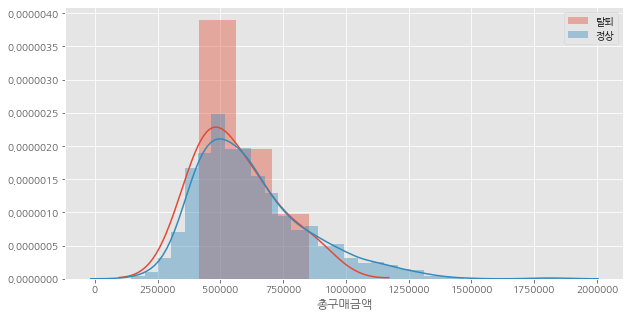

In [69]:
plt.figure(figsize=(10,5))
sns.distplot(member.loc[member['조합원상태'] == '탈퇴', '총구매금액'], label='탈퇴')
sns.distplot(member.loc[member['조합원상태'] != '탈퇴', '총구매금액'], label='정상')
plt.legend()
plt.show()

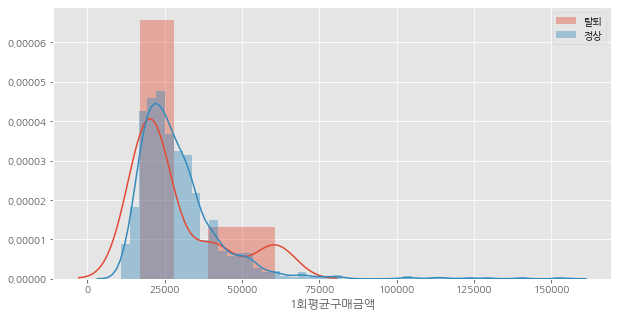

In [70]:
plt.figure(figsize=(10,5))
sns.distplot(member.loc[member['조합원상태'] == '탈퇴', '1회평균구매금액'], label='탈퇴')
sns.distplot(member.loc[member['조합원상태'] != '탈퇴', '1회평균구매금액'], label='정상')
plt.legend()
plt.show()

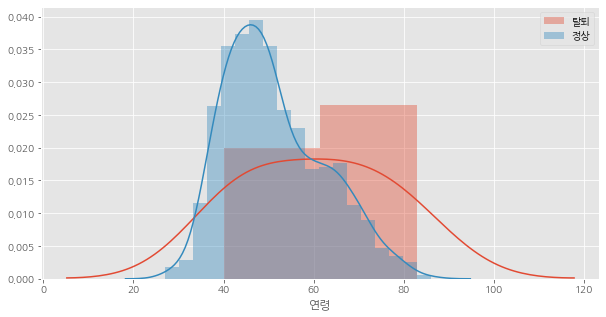

In [71]:
plt.figure(figsize=(10,5))
sns.distplot(member.loc[member['조합원상태'] == '탈퇴', '연령'], label='탈퇴')
sns.distplot(member.loc[member['조합원상태'] != '탈퇴', '연령'], label='정상')
plt.legend()
plt.show()

In [109]:
member1=member[member.조합원상태=='정상회원']

member2=member[member.조합원상태=='탈퇴']

In [111]:
t_result = stats.ttest_ind(member1['연령'], member2['연령'], equal_var=True)
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

print("2-Sample t-test")
print("t 통계량 : {}".format(t))
print("p-value : {}".format(p))

2-Sample t-test
t 통계량 : -2.194
p-value : 0.028


### *연령과 탈퇴는 유의미한 영향이 있다

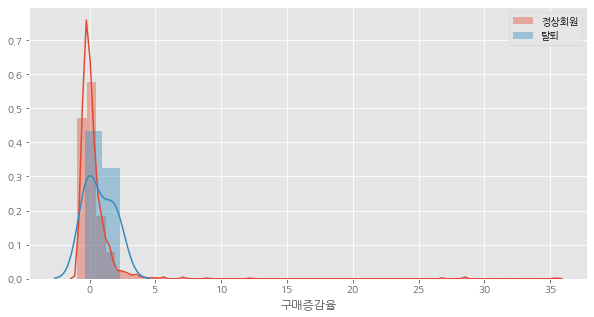

In [202]:
plt.figure(figsize=(10,5))
sns.distplot(member.loc[member['조합원상태'] == '정상회원', '구매증감율'], label='정상회원')
sns.distplot(member.loc[member['조합원상태'] != '정상회원', '구매증감율'], label='탈퇴')
plt.legend()
plt.show()

In [203]:
membe1=member[member.조합원상태=='정상회원']

membe2=member[member.조합원상태!='정상회원']

In [204]:
t_result = stats.ttest_ind(membe1['구매증감율'], membe2['구매증감율'], equal_var=True)
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

print("2-Sample t-test")
print("t 통계량 : {}".format(t))
print("p-value : {}".format(p))

2-Sample t-test
t 통계량 : -0.522
p-value : 0.602


### 성별 회원수

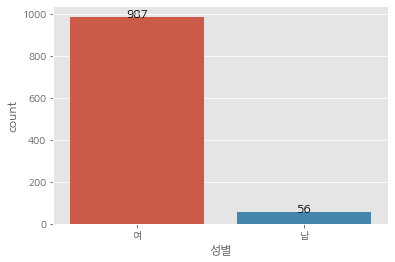

In [72]:
ax = sns.countplot(x='성별', data=member)
for p in ax.patches:
    ax.text(s = add_comma(p.get_height()), x = p.get_x()+p.get_width()/2, y = p.get_height(), ha='center', fontsize=12)

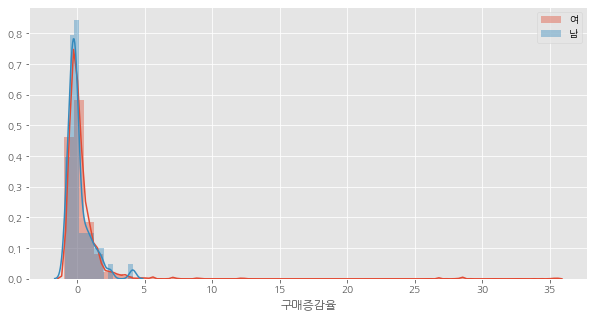

In [209]:
plt.figure(figsize=(10,5))
sns.distplot(member.loc[member['성별'] == '여', '구매증감율'], label='여')
sns.distplot(member.loc[member['성별'] != '여', '구매증감율'], label='남')
plt.legend()
plt.show()

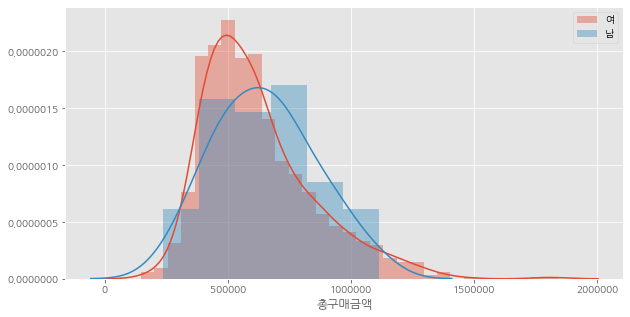

In [74]:
plt.figure(figsize=(10,5))
sns.distplot(member.loc[member['성별'] == '여', '총구매금액'], label='여')
sns.distplot(member.loc[member['성별'] != '여', '총구매금액'], label='남')
plt.legend()
plt.show()

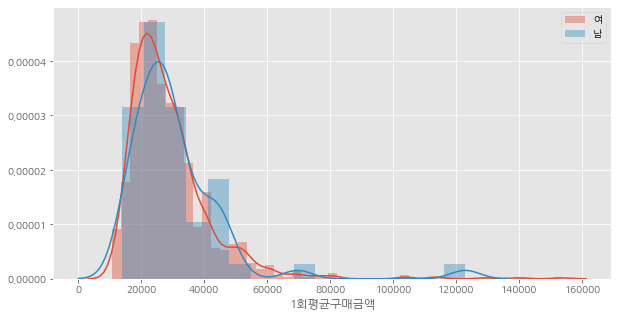

In [75]:
plt.figure(figsize=(10,5))
sns.distplot(member.loc[member['성별'] == '여', '1회평균구매금액'], label='여')
sns.distplot(member.loc[member['성별'] != '여', '1회평균구매금액'], label='남')
plt.legend()
plt.show()

In [104]:
pd.pivot_table(index='성별', values='1회평균구매금액', aggfunc='mean', data=member).reset_index()

,성별,1회평균구매금액
0,남,30782.910714
1,여,29108.703141


In [105]:
pd.pivot_table(index='성별', values='총구매금액', aggfunc='mean', data=member).reset_index()

,성별,총구매금액
0,남,650828.410714
1,여,622696.811550


In [205]:
member1=member[member.성별=='여']

member2=member[member.성별=='남']

In [ ]:
# two sample ttest

In [206]:
t_result = stats.ttest_ind(member1['총구매금액'], member2['총구매금액'], equal_var=True)
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

print("2-Sample t-test")
print("t 통계량 : {}".format(t))
print("p-value : {}".format(p))

2-Sample t-test
t 통계량 : -0.903
p-value : 0.367


In [207]:
t_result = stats.ttest_ind(member1['1회평균구매금액'], member2['1회평균구매금액'], equal_var=True)
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

print("2-Sample t-test")
print("t 통계량 : {}".format(t))
print("p-value : {}".format(p))

2-Sample t-test
t 통계량 : -0.873
p-value : 0.383


In [208]:
t_result = stats.ttest_ind(member1['구매증감율'], member2['구매증감율'], equal_var=True)
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

print("2-Sample t-test")
print("t 통계량 : {}".format(t))
print("p-value : {}".format(p))

2-Sample t-test
t 통계량 : 0.813
p-value : 0.417


### *남성의 절대적인 수는 적지만 총구매금액과 1회평균 구매액에는 차이가 없다

### 배송서비스 신청여부별 회원수

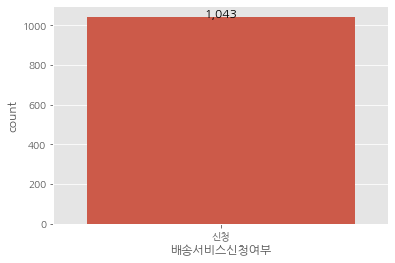

In [76]:
ax = sns.countplot(x='배송서비스신청여부', data=member)
for p in ax.patches:
    ax.text(s = add_comma(p.get_height()), x = p.get_x()+p.get_width()/2, y = p.get_height(), ha='center', fontsize=12)

### *VIP회원 전.부. 배송서비스 신청함

### 모바일 알람여부 

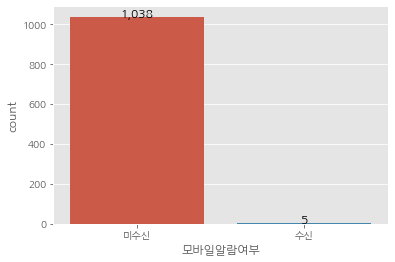

In [78]:
ax = sns.countplot(x='모바일알람여부', data=member)
for p in ax.patches:
    ax.text(s = add_comma(p.get_height()), x = p.get_x()+p.get_width()/2, y = p.get_height(), ha='center', fontsize=12)

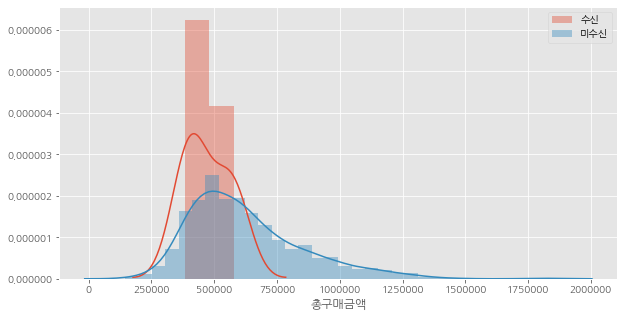

In [79]:
plt.figure(figsize=(10,5))
sns.distplot(member.loc[member['모바일알람여부'] == '수신', '총구매금액'], label='수신')
sns.distplot(member.loc[member['모바일알람여부'] != '수신', '총구매금액'], label='미수신')
plt.legend()
plt.show()

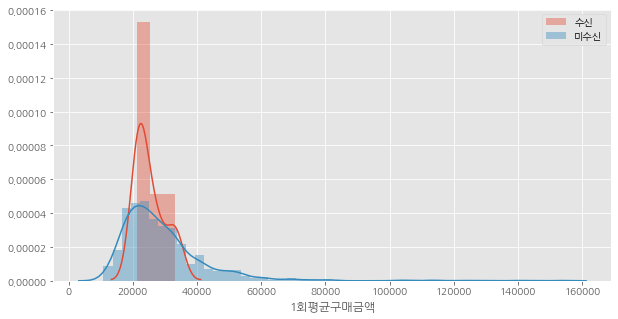

In [80]:
plt.figure(figsize=(10,5))
sns.distplot(member.loc[member['모바일알람여부'] == '수신', '1회평균구매금액'], label='수신')
sns.distplot(member.loc[member['모바일알람여부'] != '수신', '1회평균구매금액'], label='미수신')
plt.legend()
plt.show()

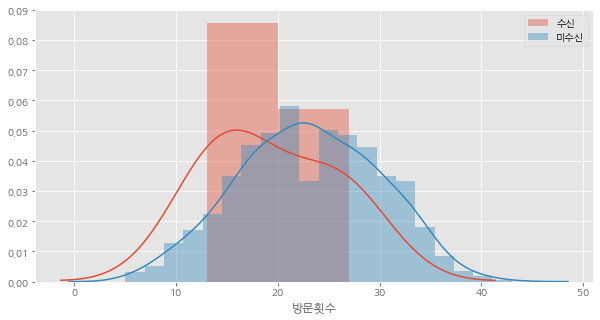

In [81]:
plt.figure(figsize=(10,5))
sns.distplot(member.loc[member['모바일알람여부'] == '수신', '방문횟수'], label='수신')
sns.distplot(member.loc[member['모바일알람여부'] != '수신', '방문횟수'], label='미수신')
plt.legend()
plt.show()

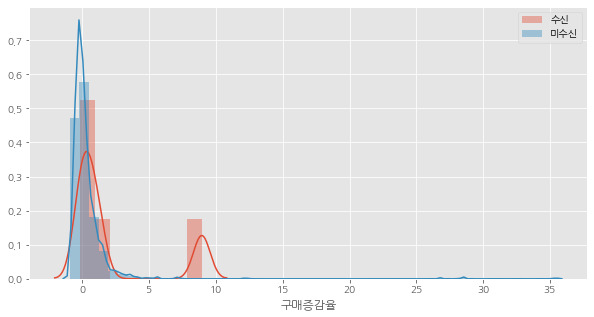

In [199]:
plt.figure(figsize=(10,5))
sns.distplot(member.loc[member['모바일알람여부'] == '수신', '구매증감율'], label='수신')
sns.distplot(member.loc[member['모바일알람여부'] != '수신', '구매증감율'], label='미수신')
plt.legend()
plt.show()

In [192]:
membe1=member[member.모바일알람여부=='수신']

membe2=member[member.모바일알람여부=='미수신']

In [193]:
t_result = stats.ttest_ind(membe1['총구매금액'], membe2['총구매금액'], equal_var=True)
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

print("2-Sample t-test")
print("t 통계량 : {}".format(t))
print("p-value : {}".format(p))

2-Sample t-test
t 통계량 : -1.503
p-value : 0.133


In [194]:
t_result = stats.ttest_ind(membe1['1회평균구매금액'], membe2['1회평균구매금액'], equal_var=True)
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

print("2-Sample t-test")
print("t 통계량 : {}".format(t))
print("p-value : {}".format(p))

2-Sample t-test
t 통계량 : -0.618
p-value : 0.537


In [195]:
t_result = stats.ttest_ind(membe1['방문횟수'], membe2['방문횟수'], equal_var=True)
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

print("2-Sample t-test")
print("t 통계량 : {}".format(t))
print("p-value : {}".format(p))

2-Sample t-test
t 통계량 : -1.161
p-value : 0.246


In [196]:
t_result = stats.ttest_ind(membe1['방문주기'], membe2['방문주기'], equal_var=True)
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

print("2-Sample t-test")
print("t 통계량 : {}".format(t))
print("p-value : {}".format(p))

2-Sample t-test
t 통계량 : -0.282
p-value : 0.778


In [197]:
t_result = stats.ttest_ind(membe1['구매증감율'], membe2['구매증감율'], equal_var=True)
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

print("2-Sample t-test")
print("t 통계량 : {}".format(t))
print("p-value : {}".format(p))

2-Sample t-test
t 통계량 : 1.931
p-value : 0.054


### *모바일알람서비스를 신청한 회원이 구매증감율이 높아지는 추세라고 말할수있을까

In [90]:
member.columns

Index(['회원번호', '조합원상태', '주소', '성별', '연령', '배송서비스신청여부', '모바일알람여부',
       'Gold_member', '연령대', '구', '동', '방문횟수', '반품횟수', '총구매금액', '1회평균구매금액',
       '주별평균구매금액', '첫방문일', '최종방문일', '미방문기간', '방문주기', '최대매출매장', '구매증감율', 'k군집',
       'VIP'],
      dtype='object')

In [90]:
member.columns

Index(['회원번호', '조합원상태', '주소', '성별', '연령', '배송서비스신청여부', '모바일알람여부',
       'Gold_member', '연령대', '구', '동', '방문횟수', '반품횟수', '총구매금액', '1회평균구매금액',
       '주별평균구매금액', '첫방문일', '최종방문일', '미방문기간', '방문주기', '최대매출매장', '구매증감율', 'k군집',
       'VIP'],
      dtype='object')

In [90]:
member.columns

Index(['회원번호', '조합원상태', '주소', '성별', '연령', '배송서비스신청여부', '모바일알람여부',
       'Gold_member', '연령대', '구', '동', '방문횟수', '반품횟수', '총구매금액', '1회평균구매금액',
       '주별평균구매금액', '첫방문일', '최종방문일', '미방문기간', '방문주기', '최대매출매장', '구매증감율', 'k군집',
       'VIP'],
      dtype='object')

In [90]:
member.columns

Index(['회원번호', '조합원상태', '주소', '성별', '연령', '배송서비스신청여부', '모바일알람여부',
       'Gold_member', '연령대', '구', '동', '방문횟수', '반품횟수', '총구매금액', '1회평균구매금액',
       '주별평균구매금액', '첫방문일', '최종방문일', '미방문기간', '방문주기', '최대매출매장', '구매증감율', 'k군집',
       'VIP'],
      dtype='object')

### 구별 회원수

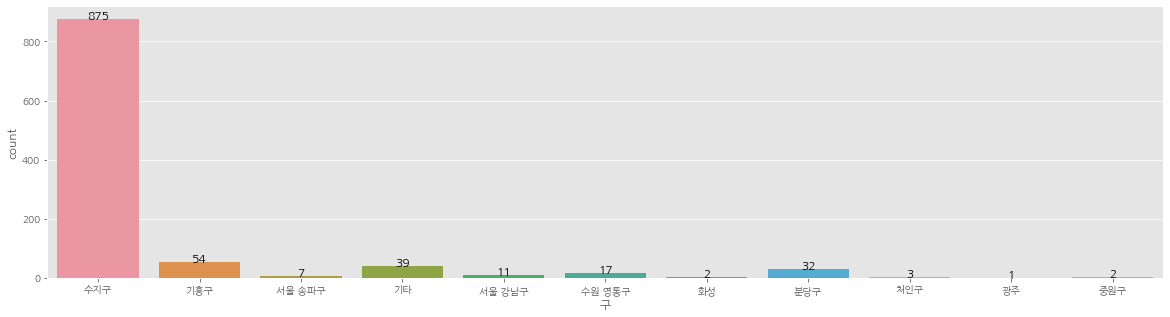

In [82]:
plt.figure(figsize=(20,5))
ax = sns.countplot(x='구', data=member)
for p in ax.patches:
    ax.text(s = add_comma(p.get_height()), x = p.get_x()+p.get_width()/2, y = p.get_height(), ha='center', fontsize=12)

In [83]:
gu_price_sum = pd.pivot_table(index='구', values='총구매금액', aggfunc='sum',data=member).reset_index()
gu_price_mean = pd.pivot_table(index='구', values='총구매금액', aggfunc='mean',data=member).reset_index()
gu_price1 = pd.pivot_table(index='구', values='1회평균구매금액', aggfunc='mean',data=member).reset_index()

### 구별 총구매금액

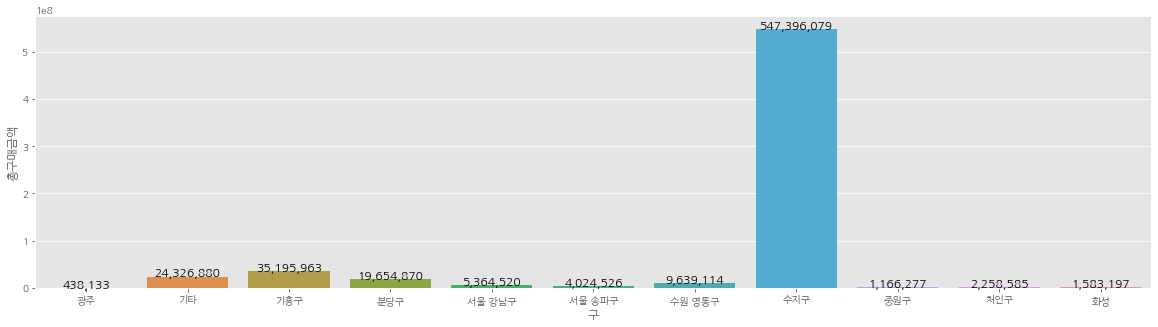

In [84]:
plt.figure(figsize=(20,5))

ax = sns.barplot(x='구', y='총구매금액', data=gu_price_sum)
for p in ax.patches:
    ax.text(s = add_comma(p.get_height()), x = p.get_x()+p.get_width()/2, y = p.get_height(), ha='center', fontsize=12)

### 구별 총구매금액 평균

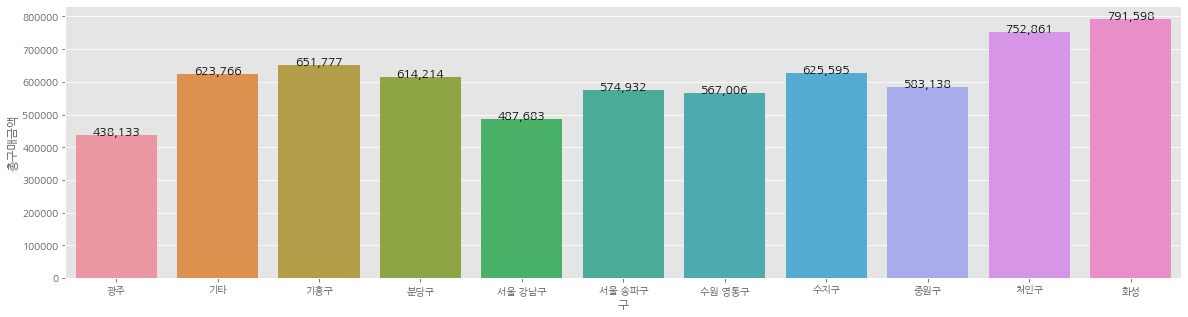

In [87]:
plt.figure(figsize=(20,5))

ax = sns.barplot(x='구', y='총구매금액', data=gu_price_mean)
for p in ax.patches:
    ax.text(s = add_comma(p.get_height()), x = p.get_x()+p.get_width()/2, y = p.get_height(), ha='center', fontsize=12)

### 구별 1회평균구매금액

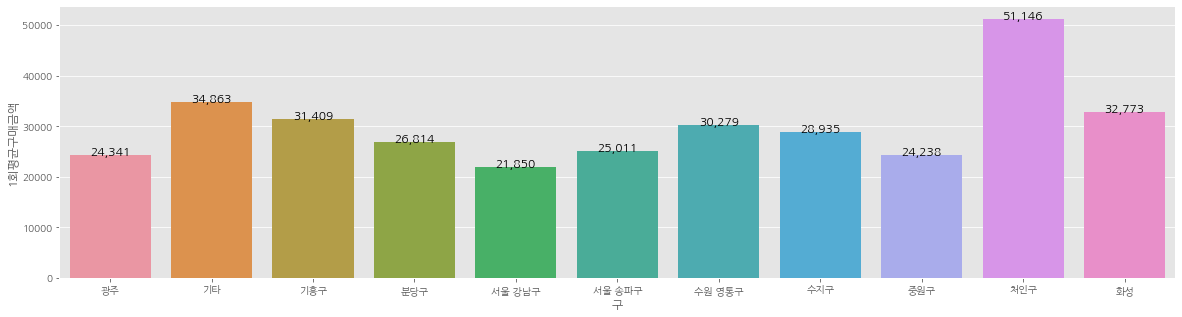

In [88]:
plt.figure(figsize=(20,5))

ax = sns.barplot(x='구', y='1회평균구매금액', data=gu_price1)
for p in ax.patches:
    ax.text(s = add_comma(p.get_height()), x = p.get_x()+p.get_width()/2, y = p.get_height(), ha='center', fontsize=12)

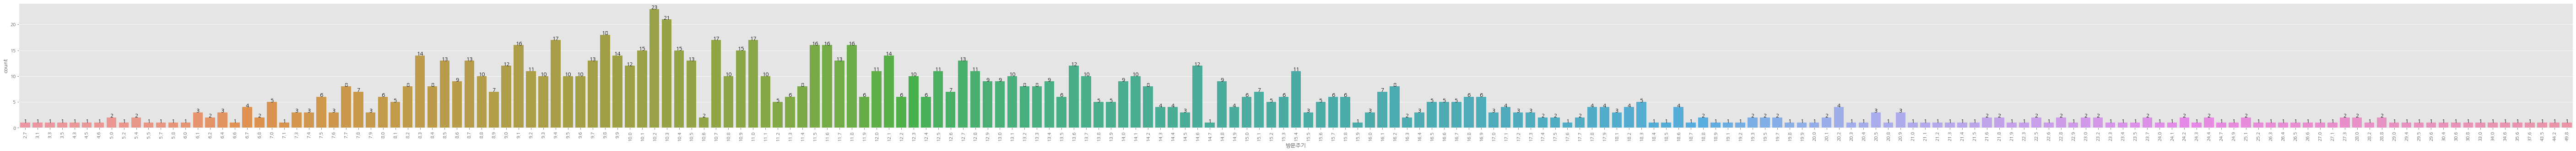

In [91]:
plt.figure(figsize=(100,5))
ax = sns.countplot(x='방문주기', data=member, order=sorted(member['방문주기'].unique()))
for p in ax.patches:
    ax.text(s = p.get_height(), x = p.get_x()+p.get_width()/2, y = p.get_height(), ha='center', fontsize=12)
    
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='center')
plt.show()

### 반품횟수 분석

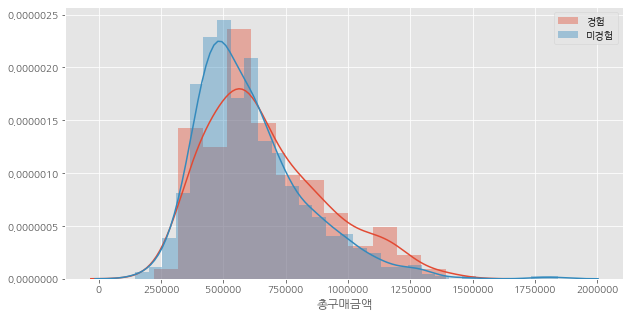

In [92]:
plt.figure(figsize=(10,5))
sns.distplot(member.loc[member['반품횟수'] >= 1, '총구매금액'], label='경험')
sns.distplot(member.loc[member['반품횟수'] < 1, '총구매금액'], label='미경험')
plt.legend()
plt.show()

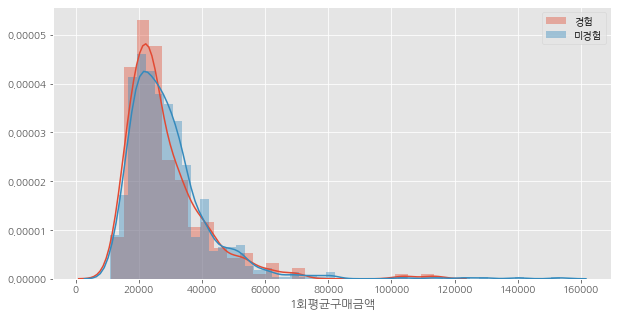

In [93]:
plt.figure(figsize=(10,5))
sns.distplot(member.loc[member['반품횟수'] >= 1, '1회평균구매금액'], label='경험')
sns.distplot(member.loc[member['반품횟수'] < 1, '1회평균구매금액'], label='미경험')
plt.legend()
plt.show()

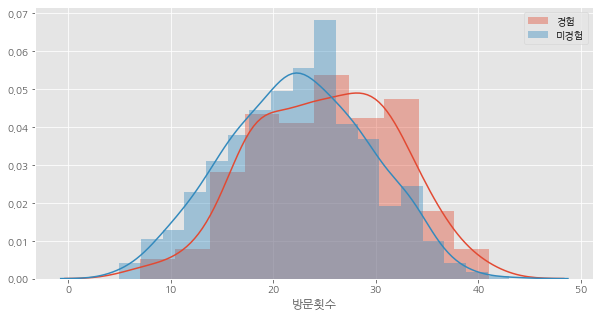

In [94]:
plt.figure(figsize=(10,5))
sns.distplot(member.loc[member['반품횟수'] >= 1, '방문횟수'], label='경험')
sns.distplot(member.loc[member['반품횟수'] < 1, '방문횟수'], label='미경험')
plt.legend()
plt.show()

### 총구매금액 히스토그램

(array([ 28., 289., 353., 184., 112.,  46.,  24.,   5.,   0.,   2.]),
 array([ 145975. ,  315649.3,  485323.6,  654997.9,  824672.2,  994346.5,
        1164020.8, 1333695.1, 1503369.4, 1673043.7, 1842718. ]),
 <a list of 10 Patch objects>)

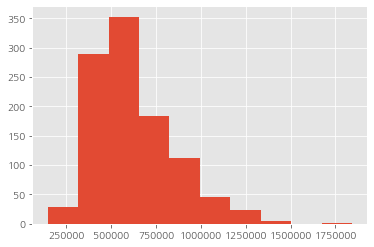

In [95]:
plt.hist(member['총구매금액'])

(array([488., 391., 121.,  23.,  12.,   0.,   2.,   3.,   1.,   2.]),
 array([ 10836. ,  25108.4,  39380.8,  53653.2,  67925.6,  82198. ,
         96470.4, 110742.8, 125015.2, 139287.6, 153560. ]),
 <a list of 10 Patch objects>)

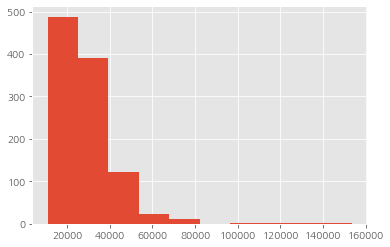

In [96]:
plt.hist(member['1회평균구매금액'])

### 숫자 변수

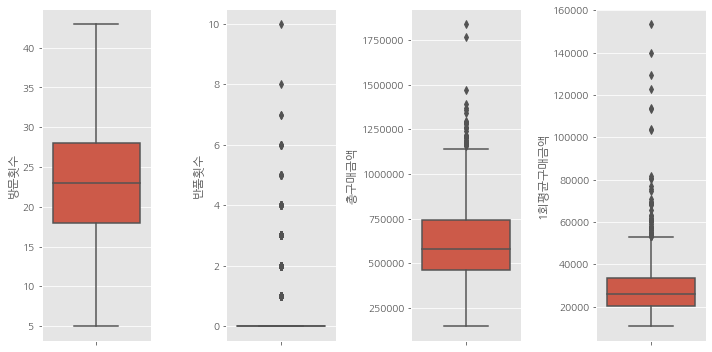

In [97]:
plt.figure(figsize=(10,5))
for i, col in enumerate(['방문횟수', '반품횟수', '총구매금액', '1회평균구매금액']):
    sns.boxplot(y=member[col],ax=plt.subplot(1, 4, i+1))
plt.tight_layout()

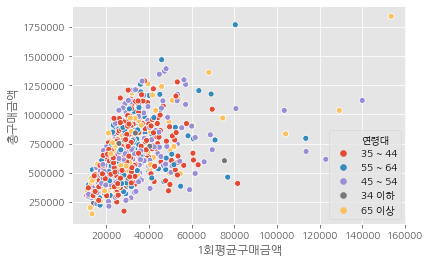

In [114]:
sns.scatterplot(x="1회평균구매금액",y='총구매금액',hue="연령대",data=member)
  #hue:그룹변수, style: 그룹별 marker구분

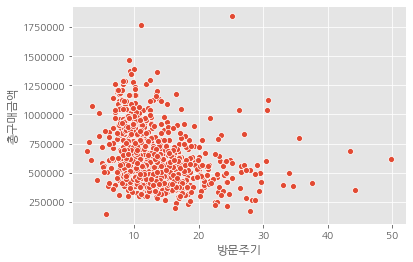

In [116]:
sns.scatterplot(x="방문주기",y='총구매금액',data=member)
  #hue:그룹변수, style: 그룹별 marker구분

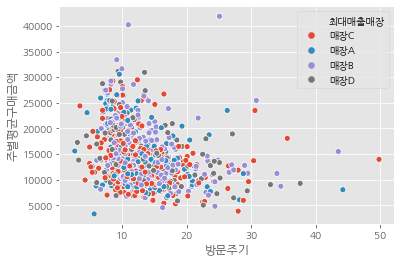

In [118]:
sns.scatterplot(x="방문주기",y='주별평균구매금액',hue='최대매출매장',data=member)
  #hue:그룹변수, style: 그룹별 marker구분

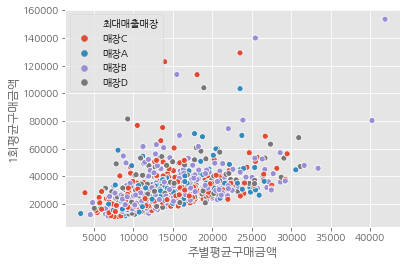

In [120]:
sns.scatterplot(x="주별평균구매금액",y='1회평균구매금액',hue='최대매출매장',data=member)
  #hue:그룹변수, style: 그룹별 marker구분

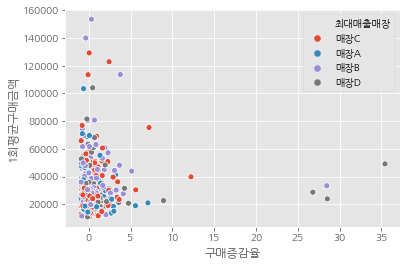

In [121]:
sns.scatterplot(x="구매증감율",y='1회평균구매금액',hue='최대매출매장',data=member)
  #hue:그룹변수, style: 그룹별 marker구분

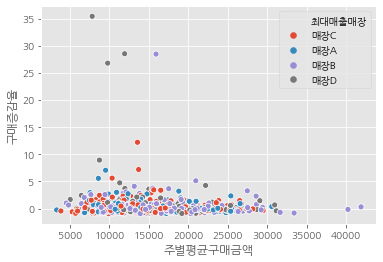

In [122]:
sns.scatterplot(x="주별평균구매금액",y='구매증감율',hue='최대매출매장',data=member)
  #hue:그룹변수, style: 그룹별 marker구분

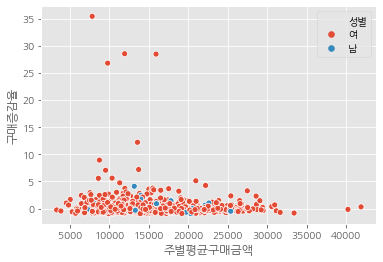

In [123]:
sns.scatterplot(x="주별평균구매금액",y='구매증감율',hue='성별',data=member)
  #hue:그룹변수, style: 그룹별 marker구분

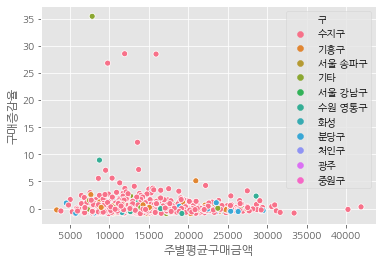

In [124]:
sns.scatterplot(x="주별평균구매금액",y='구매증감율',hue='구',data=member)
  #hue:그룹변수, style: 그룹별 marker구분

# 두 집단 비교

In [249]:
# 군집1: 2251 , 군집2: 2597, 군집3: 1968, 군집4: 1815, 군집5: 1043

In [428]:
mem0=member[member.k군집==1]

mem1=member[member.k군집==1]

mem2=member[member.k군집==4]
mem3=member[member.k군집==4]


mem4=member[member.k군집==4]
mem5=member[member.k군집==5]

In [276]:
member=member[member.k군집>3]
member.head()

,회원번호,조합원상태,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,연령대,구,...,1회평균구매금액,주별평균구매금액,첫방문일,최종방문일,미방문기간,방문주기,최대매출매장,구매증감율,k군집,VIP
1,1000103744,정상회원,처인구-고림동,여,34,미신청,미수신,normal,34 이하,처인구,...,36948,839,286,286,18,0.0,매장C,0.000,4,0
2,1000122304,정상회원,광주-기타,여,38,미신청,미수신,normal,35 ~ 44,광주,...,9522,3246,104,304,0,13.3,매장C,0.859,4,0
4,1000281920,정상회원,수지구-풍덕천동,여,42,신청,미수신,normal,35 ~ 44,수지구,...,22591,14376,2,279,25,9.9,매장C,-0.305,5,1
12,1001042880,정상회원,수지구-신봉동,여,42,미신청,미수신,normal,35 ~ 44,수지구,...,3574,243,17,124,180,35.7,매장C,-0.698,4,0
14,100134912,정상회원,수지구-성복동,여,49,미신청,미수신,normal,45 ~ 54,수지구,...,7236,493,156,265,39,36.3,매장C,4.300,4,0


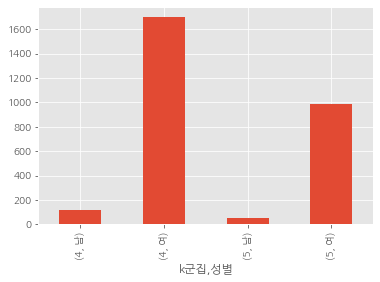

In [277]:
df_groupby_total=member.groupby(['k군집','성별'], \
                                   as_index=False).size()

df_groupby_total.plot.bar()

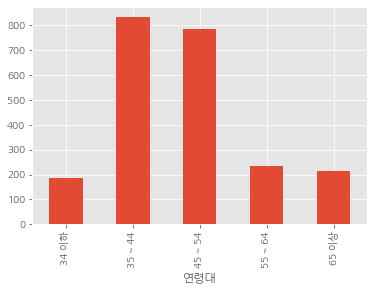

In [435]:
df_groupby_total=mem0.groupby(['연령대'], \
                                   as_index=False).size()

df_groupby_total.plot.bar()

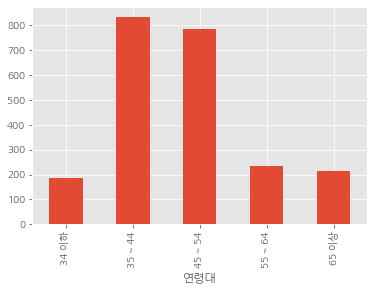

In [436]:
df_groupby_total=mem1.groupby(['연령대'], \
                                   as_index=False).size()

df_groupby_total.plot.bar()

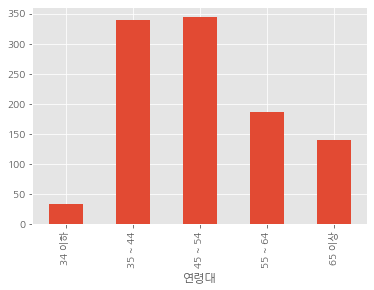

In [434]:
df_groupby_total=mem5.groupby(['연령대'], \
                                   as_index=False).size()

df_groupby_total.plot.bar()

In [ ]:
## 잠시 모바일 알람 껴

In [448]:
mem0=member[member.k군집==1]
mem1=member[member.k군집==1]
mem2=member[member.k군집==4]
mem3=member[member.k군집==4]
mem4=member[member.k군집==4]
mem5=member[member.k군집==5]

In [449]:
mem0['모바일']=0
mem0.loc[mem0['모바일알람여부']=='수신','모바일']=1

/home/piai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/piai/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [453]:
mem1['모바일']=0
mem1.loc[mem0['모바일알람여부']=='수신','모바일']=1

/home/piai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,회원번호,조합원상태,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,연령대,구,...,주별평균구매금액,첫방문일,최종방문일,미방문기간,방문주기,최대매출매장,구매증감율,k군집,VIP,모바일
13,1001111552,정상회원,수지구-풍덕천동,여,47,미신청,미수신,normal,45 ~ 54,수지구,...,18892,3,302,2,8.8,매장C,0.418,1,0,0
28,1002115648,정상회원,수지구-풍덕천동,여,61,미신청,미수신,normal,55 ~ 64,수지구,...,804,45,169,135,41.3,매장C,-0.598,1,0,0
29,1002182464,정상회원,수지구-풍덕천동,여,37,미신청,미수신,normal,35 ~ 44,수지구,...,613,6,290,14,71.0,매장C,0.518,1,0,0
31,100225856,정상회원,수지구-풍덕천동,여,48,미신청,미수신,normal,45 ~ 54,수지구,...,617,92,92,212,0.0,매장C,0.000,1,0,0
43,1005230016,정상회원,수지구-풍덕천동,여,42,미신청,미수신,normal,35 ~ 44,수지구,...,551,23,42,262,6.3,매장C,2.480,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11490,99661632,정상회원,수지구-풍덕천동,여,44,미신청,미수신,normal,35 ~ 44,수지구,...,4022,24,275,29,15.7,매장C,-0.052,1,0,0
11502,997928512,정상회원,수지구-풍덕천동,여,46,미신청,미수신,normal,45 ~ 54,수지구,...,6912,6,304,0,11.0,매장C,-0.124,1,0,0
11504,998286720,정상회원,수지구-풍덕천동,여,44,미신청,미수신,normal,35 ~ 44,수지구,...,6846,8,290,14,13.4,매장C,0.380,1,0,0
11511,998576256,정상회원,수지구-풍덕천동,여,39,미신청,미수신,normal,35 ~ 44,수지구,...,237,102,280,24,59.3,매장C,-0.323,1,0,0


In [451]:
mem2['모바일']=0
mem2.loc[mem0['모바일알람여부']=='수신','모바일']=1

/home/piai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


IndexingError: (13       False
28       False
29       False
31       False
43       False
         ...  
11490    False
11502    False
11504    False
11511    False
11527    False
Name: 모바일알람여부, Length: 2251, dtype: bool, '모바일')

In [452]:
mem3['모바일']=0
mem3.loc[mem0['모바일알람여부']=='수신','모바일']=1

/home/piai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


IndexingError: (13       False
28       False
29       False
31       False
43       False
         ...  
11490    False
11502    False
11504    False
11511    False
11527    False
Name: 모바일알람여부, Length: 2251, dtype: bool, '모바일')

In [445]:
mem4['모바일']=0
mem4.loc[mem0['모바일알람여부']=='수신','모바일']=1

/home/piai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


IndexingError: (13       False
28       False
29       False
31       False
43       False
         ...  
11490    False
11502    False
11504    False
11511    False
11527    False
Name: 모바일알람여부, Length: 2251, dtype: bool, '모바일')

In [446]:
mem5['모바일']=0
mem5.loc[mem0['모바일알람여부']=='수신','모바일']=1

/home/piai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


IndexingError: (13       False
28       False
29       False
31       False
43       False
         ...  
11490    False
11502    False
11504    False
11511    False
11527    False
Name: 모바일알람여부, Length: 2251, dtype: bool, '모바일')

In [438]:
t_result = stats.ttest_ind(mem0['모바일알람여부'], mem5['모바일알람여부'], equal_var=True)
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

print("2-Sample t-test")
print("t 통계량 : {}".format(t))
print("p-value : {}".format(p))

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [429]:
t_result = stats.ttest_ind(mem0['연령'], mem5['연령'], equal_var=True)
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

print("2-Sample t-test")
print("t 통계량 : {}".format(t))
print("p-value : {}".format(p))

2-Sample t-test
t 통계량 : -6.695
p-value : 0.0


In [424]:
t_result = stats.ttest_ind(mem1['연령'], mem5['연령'], equal_var=True)
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

print("2-Sample t-test")
print("t 통계량 : {}".format(t))
print("p-value : {}".format(p))

2-Sample t-test
t 통계량 : -6.695
p-value : 0.0


In [425]:
t_result = stats.ttest_ind(mem2['연령'], mem5['연령'], equal_var=True)
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

print("2-Sample t-test")
print("t 통계량 : {}".format(t))
print("p-value : {}".format(p))

2-Sample t-test
t 통계량 : -1.555
p-value : 0.12


In [426]:
t_result = stats.ttest_ind(mem3['연령'], mem5['연령'], equal_var=True)
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

print("2-Sample t-test")
print("t 통계량 : {}".format(t))
print("p-value : {}".format(p))

2-Sample t-test
t 통계량 : -1.555
p-value : 0.12


In [427]:
t_result = stats.ttest_ind(mem4['연령'], mem5['연령'], equal_var=True)
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

print("2-Sample t-test")
print("t 통계량 : {}".format(t))
print("p-value : {}".format(p))

2-Sample t-test
t 통계량 : -1.555
p-value : 0.12


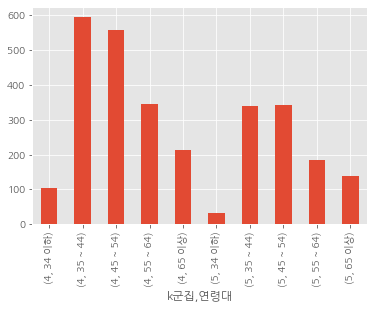

In [278]:
df_groupby_total=member.groupby(['k군집','연령대'], \
                                   as_index=False).size()

df_groupby_total.plot.bar()

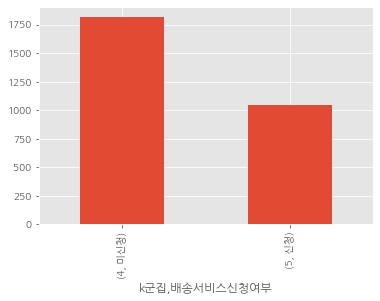

In [263]:
df_groupby_total=member.groupby(['k군집','배송서비스신청여부'], \
                                   as_index=False).size()

df_groupby_total.plot.bar()

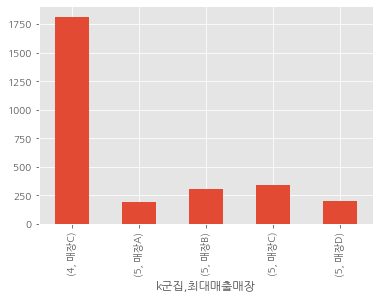

In [265]:
df_groupby_total=member.groupby(['k군집','최대매출매장'], \
                                   as_index=False).size()

df_groupby_total.plot.bar()

# 전체

In [294]:
member=memberr

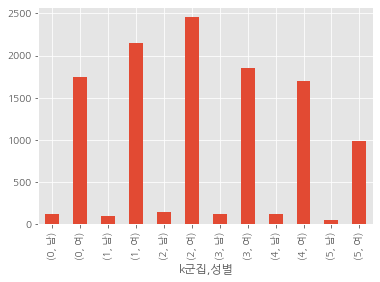

In [295]:
df_groupby_total=member.groupby(['k군집','성별'], \
                                   as_index=False).size()

df_groupby_total.plot.bar()

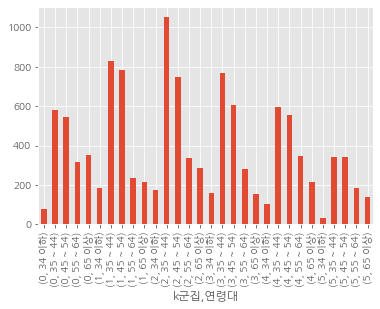

In [296]:
df_groupby_total=member.groupby(['k군집','연령대'], \
                                   as_index=False).size()

df_groupby_total.plot.bar()

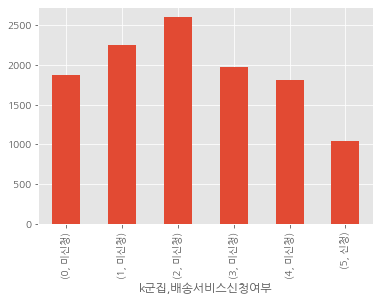

In [297]:
df_groupby_total=member.groupby(['k군집','배송서비스신청여부'], \
                                   as_index=False).size()

df_groupby_total.plot.bar()

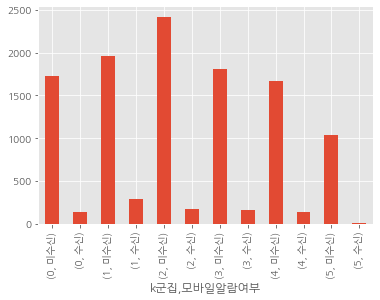

In [298]:
df_groupby_total=member.groupby(['k군집','모바일알람여부'], \
                                   as_index=False).size()

df_groupby_total.plot.bar()

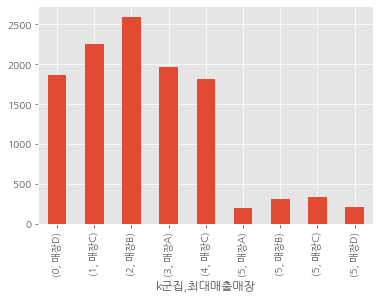

In [299]:
df_groupby_total=member.groupby(['k군집','최대매출매장'], \
                                   as_index=False).size()

df_groupby_total.plot.bar()

# 1번군집과 4번군집은 어떤 기준으로 나뉜걸까?

In [362]:
member=memberr

In [363]:
member=member[member.k군집!=2]
member=member[member.k군집!=3]
member=member[member.k군집!=5]
member=member[member.k군집!=0]
member.head()

,회원번호,조합원상태,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,연령대,구,...,1회평균구매금액,주별평균구매금액,첫방문일,최종방문일,미방문기간,방문주기,최대매출매장,구매증감율,k군집,VIP
1,1000103744,정상회원,처인구-고림동,여,34,미신청,미수신,normal,34 이하,처인구,...,36948,839,286,286,18,0.0,매장C,0.000,4,0
2,1000122304,정상회원,광주-기타,여,38,미신청,미수신,normal,35 ~ 44,광주,...,9522,3246,104,304,0,13.3,매장C,0.859,4,0
12,1001042880,정상회원,수지구-신봉동,여,42,미신청,미수신,normal,35 ~ 44,수지구,...,3574,243,17,124,180,35.7,매장C,-0.698,4,0
13,1001111552,정상회원,수지구-풍덕천동,여,47,미신청,미수신,normal,45 ~ 54,수지구,...,24449,18892,3,302,2,8.8,매장C,0.418,1,0
14,100134912,정상회원,수지구-성복동,여,49,미신청,미수신,normal,45 ~ 54,수지구,...,7236,493,156,265,39,36.3,매장C,4.300,4,0


In [381]:
mem1=member[member.k군집==1]
mem4=member[member.k군집==4]

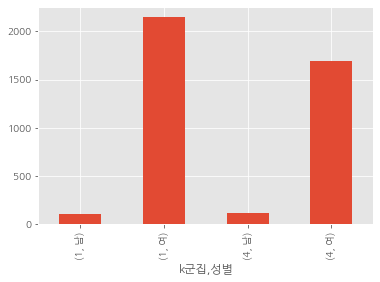

In [364]:
df_groupby_total=member.groupby(['k군집','성별'], \
                                   as_index=False).size()

df_groupby_total.plot.bar()

1         AxesSubplot(0.1,0.15;0.363636x0.75)
4    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

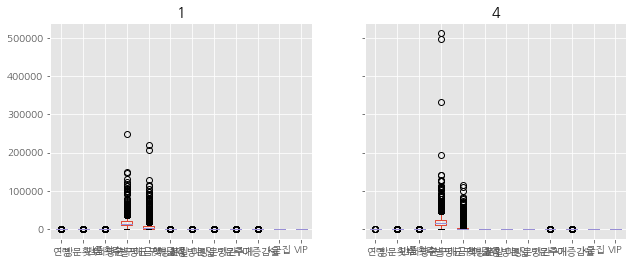

In [367]:
member1=member.drop(['회원번호','총구매금액','조합원상태'],axis=1)
#member=member['VIP']

df_raw=member1.groupby(['k군집'],as_index=False)
# (['회원번호','총구매금액','1회평균구매금액'], axis=1) 

df_raw.boxplot(figsize=(10,4))

1         AxesSubplot(0.1,0.15;0.363636x0.75)
4    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

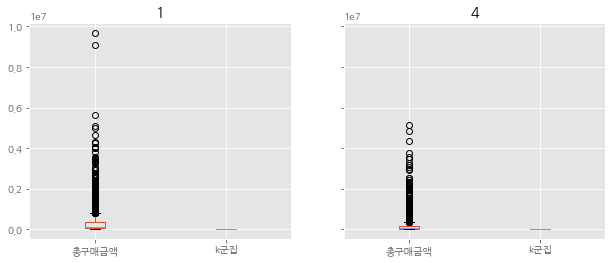

In [378]:
#member=member['VIP']

member1=member[['총구매금액','k군집']]

df_raw=member1.groupby(['k군집'],as_index=False)
# (['회원번호','총구매금액','1회평균구매금액'], axis=1) 

df_raw.boxplot(figsize=(10,4))

In [383]:
t_result = stats.ttest_ind(mem1['총구매금액'], mem4['총구매금액'], equal_var=True)
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

print("2-Sample t-test")
print("t 통계량 : {}".format(t))
print("p-value : {}".format(p))

2-Sample t-test
t 통계량 : 9.313
p-value : 0.0


1         AxesSubplot(0.1,0.15;0.363636x0.75)
4    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

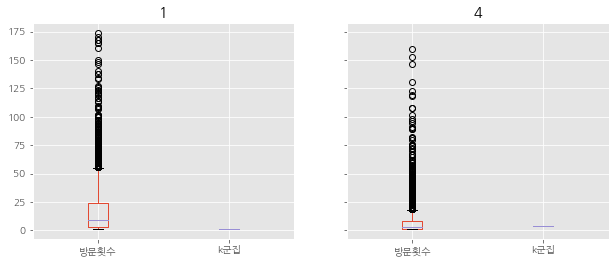

In [373]:
#member=member['VIP']

member1=member[['방문횟수','k군집']]

df_raw=member1.groupby(['k군집'],as_index=False)
# (['회원번호','총구매금액','1회평균구매금액'], axis=1) 

df_raw.boxplot(figsize=(10,4))

In [384]:
t_result = stats.ttest_ind(mem1['방문횟수'], mem4['방문횟수'], equal_var=True)
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

print("2-Sample t-test")
print("t 통계량 : {}".format(t))
print("p-value : {}".format(p))

2-Sample t-test
t 통계량 : 14.807
p-value : 0.0


1         AxesSubplot(0.1,0.15;0.363636x0.75)
4    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

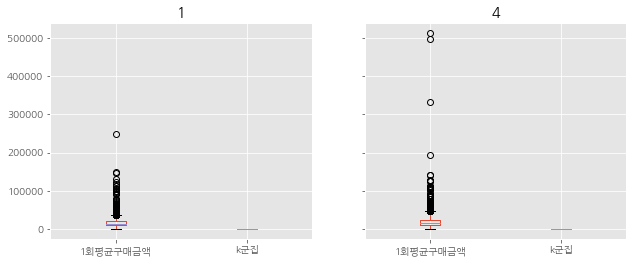

In [374]:
#member=member['VIP']

member1=member[['1회평균구매금액','k군집']]

df_raw=member1.groupby(['k군집'],as_index=False)
# (['회원번호','총구매금액','1회평균구매금액'], axis=1) 

df_raw.boxplot(figsize=(10,4))

In [385]:
t_result = stats.ttest_ind(mem1['1회평균구매금액'], mem4['1회평균구매금액'], equal_var=True)
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

print("2-Sample t-test")
print("t 통계량 : {}".format(t))
print("p-value : {}".format(p))

2-Sample t-test
t 통계량 : -5.43
p-value : 0.0


1         AxesSubplot(0.1,0.15;0.363636x0.75)
4    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

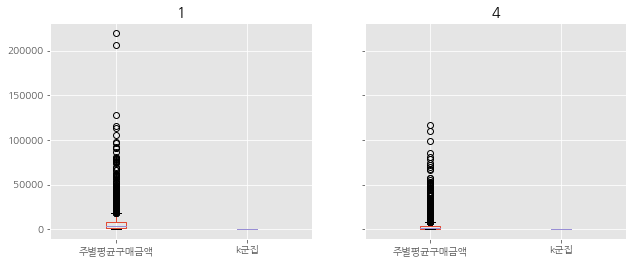

In [375]:
#member=member['VIP']

member1=member[['주별평균구매금액','k군집']]

df_raw=member1.groupby(['k군집'],as_index=False)
# (['회원번호','총구매금액','1회평균구매금액'], axis=1) 

df_raw.boxplot(figsize=(10,4))

In [386]:
t_result = stats.ttest_ind(mem1['주별평균구매금액'], mem4['주별평균구매금액'], equal_var=True)
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

print("2-Sample t-test")
print("t 통계량 : {}".format(t))
print("p-value : {}".format(p))

2-Sample t-test
t 통계량 : 9.313
p-value : 0.0


1         AxesSubplot(0.1,0.15;0.363636x0.75)
4    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

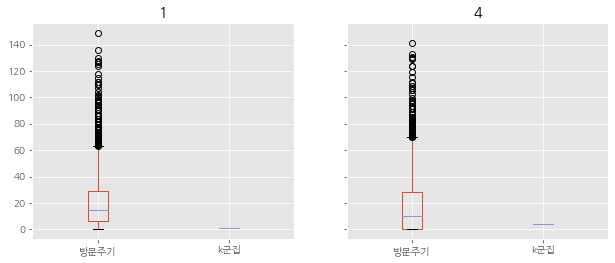

In [376]:
#member=member['VIP']

member1=member[['방문주기','k군집']]

df_raw=member1.groupby(['k군집'],as_index=False)
# (['회원번호','총구매금액','1회평균구매금액'], axis=1) 

df_raw.boxplot(figsize=(10,4))

In [387]:
t_result = stats.ttest_ind(mem1['방문주기'], mem4['방문주기'], equal_var=True)
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

print("2-Sample t-test")
print("t 통계량 : {}".format(t))
print("p-value : {}".format(p))

2-Sample t-test
t 통계량 : 3.275
p-value : 0.001


1         AxesSubplot(0.1,0.15;0.363636x0.75)
4    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

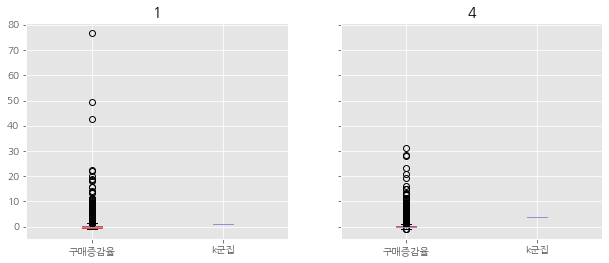

In [377]:
#member=member['VIP']

member1=member[['구매증감율','k군집']]

df_raw=member1.groupby(['k군집'],as_index=False)
# (['회원번호','총구매금액','1회평균구매금액'], axis=1) 

df_raw.boxplot(figsize=(10,4))

In [388]:
t_result = stats.ttest_ind(mem1['구매증감율'], mem4['구매증감율'], equal_var=True)
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

print("2-Sample t-test")
print("t 통계량 : {}".format(t))
print("p-value : {}".format(p))

2-Sample t-test
t 통계량 : 0.024
p-value : 0.981


In [391]:
mem1.describe()

,회원번호,연령,방문횟수,반품횟수,총구매금액,1회평균구매금액,주별평균구매금액,첫방문일,최종방문일,미방문기간,방문주기,구매증감율,k군집,VIP
count,2.251000e+03,2251.000000,2251.000000,2251.000000,2.251000e+03,2251.000000,2251.000000,2251.000000,2251.000000,2251.000000,2251.000000,2251.00000,2251.0,2251.0
mean,8.392171e+08,48.462905,18.481120,0.318969,3.496842e+05,17783.367837,7946.877832,53.612172,247.479343,56.520657,20.383074,0.49782,1.0,0.0
std,4.562259e+08,11.213319,24.234612,1.373557,6.289117e+05,13787.024413,14293.455337,70.980881,74.804788,74.804788,20.416649,2.82499,0.0,0.0
min,1.962720e+07,23.000000,1.000000,0.000000,1.723000e+03,1723.000000,39.000000,2.000000,2.000000,0.000000,0.000000,-1.00000,1.0,0.0
25%,4.460664e+08,41.000000,3.000000,0.000000,4.494050e+04,10588.000000,1021.000000,6.000000,226.000000,5.000000,6.100000,-0.37700,1.0,0.0
50%,7.907284e+08,47.000000,9.000000,0.000000,1.349170e+05,14770.000000,3066.000000,20.000000,284.000000,20.000000,14.800000,0.00000,1.0,0.0
75%,1.231126e+09,53.000000,24.000000,0.000000,3.468435e+05,20863.500000,7882.000000,70.000000,299.000000,78.000000,28.950000,0.42500,1.0,0.0
max,1.643490e+09,91.000000,174.000000,27.000000,9.681161e+06,248874.000000,220026.000000,303.000000,304.000000,302.000000,149.000000,76.80300,1.0,0.0


In [392]:
mem4.describe()

,회원번호,연령,방문횟수,반품횟수,총구매금액,1회평균구매금액,주별평균구매금액,첫방문일,최종방문일,미방문기간,방문주기,구매증감율,k군집,VIP
count,1.815000e+03,1815.000000,1815.000000,1815.000000,1.815000e+03,1815.000000,1815.000000,1815.000000,1815.000000,1815.000000,1815.000000,1815.000000,1815.0,1815.0
mean,7.353522e+08,50.580165,8.642424,0.189532,1.873963e+05,21082.909642,4258.505785,93.058402,208.069421,95.930579,18.157025,0.495844,4.0,0.0
std,4.384674e+08,11.499103,16.289635,0.939399,4.392298e+05,24400.954648,9982.496890,87.944147,89.586559,89.586559,22.866258,2.310391,0.0,0.0
min,1.861382e+07,25.000000,1.000000,0.000000,7.660000e+02,766.000000,17.000000,2.000000,2.000000,0.000000,0.000000,-1.000000,4.0,0.0
25%,3.608704e+08,42.000000,1.000000,0.000000,1.780400e+04,10338.000000,404.000000,16.000000,141.500000,16.000000,0.000000,-0.260000,4.0,0.0
50%,7.436695e+08,49.000000,3.000000,0.000000,5.168900e+04,16231.000000,1174.000000,62.000000,238.000000,66.000000,10.000000,0.000000,4.0,0.0
75%,1.053618e+09,59.000000,8.000000,0.000000,1.480790e+05,25155.500000,3365.000000,155.500000,288.000000,162.500000,27.950000,0.220500,4.0,0.0
max,1.670606e+09,92.000000,160.000000,18.000000,5.137458e+06,513063.000000,116760.000000,304.000000,304.000000,302.000000,141.500000,30.998000,4.0,0.0


# 1과 vip의 금액비교

In [395]:
member=memberr

In [396]:
mem5=member[member.k군집==5]

In [397]:
mem5.describe()

,회원번호,연령,방문횟수,반품횟수,총구매금액,1회평균구매금액,주별평균구매금액,첫방문일,최종방문일,미방문기간,방문주기,구매증감율,k군집,VIP
count,1.043000e+03,1043.000000,1043.000000,1043.000000,1.043000e+03,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.0,1043.0
mean,7.405007e+08,51.266539,23.005753,0.463087,6.242072e+05,29198.593480,14186.040268,19.347076,286.909875,17.090125,12.845925,0.332919,5.0,1.0
std,4.265089e+08,11.104887,6.964536,1.127789,2.267801e+05,13956.464185,5154.088948,29.418457,25.997223,25.997223,4.969227,2.100127,0.0,0.0
min,1.894234e+07,27.000000,5.000000,0.000000,1.459750e+05,10836.000000,3317.000000,2.000000,54.000000,0.000000,2.700000,-0.952000,5.0,1.0
25%,3.929783e+08,43.000000,18.000000,0.000000,4.640065e+05,20584.000000,10545.000000,5.000000,284.000000,3.000000,9.700000,-0.341500,5.0,1.0
50%,7.476321e+08,49.000000,23.000000,0.000000,5.777680e+05,26025.000000,13131.000000,9.000000,296.000000,8.000000,11.700000,-0.039000,5.0,1.0
75%,1.040587e+09,59.000000,28.000000,0.000000,7.394895e+05,33548.500000,16806.000000,20.000000,301.000000,20.000000,14.800000,0.467000,5.0,1.0
max,1.620062e+09,86.000000,43.000000,10.000000,1.842718e+06,153560.000000,41879.000000,252.000000,304.000000,250.000000,49.800000,35.428000,5.0,1.0


In [411]:
t_result = stats.ttest_ind(mem1['총구매금액'], mem5['총구매금액'], equal_var=True)
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

print("2-Sample t-test")
print("t 통계량 : {}".format(t))
print("p-value : {}".format(p))

2-Sample t-test
t 통계량 : -13.69
p-value : 0.0


In [412]:
t_result = stats.ttest_ind(mem1['방문횟수'], mem5['방문횟수'], equal_var=True)
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

print("2-Sample t-test")
print("t 통계량 : {}".format(t))
print("p-value : {}".format(p))

2-Sample t-test
t 통계량 : -5.917
p-value : 0.0


In [413]:
t_result = stats.ttest_ind(mem1['1회평균구매금액'], mem5['1회평균구매금액'], equal_var=True)
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

print("2-Sample t-test")
print("t 통계량 : {}".format(t))
print("p-value : {}".format(p))

2-Sample t-test
t 통계량 : -22.019
p-value : 0.0


In [414]:
t_result = stats.ttest_ind(mem1['주별평균구매금액'], mem5['주별평균구매금액'], equal_var=True)
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

print("2-Sample t-test")
print("t 통계량 : {}".format(t))
print("p-value : {}".format(p))

2-Sample t-test
t 통계량 : -13.69
p-value : 0.0


In [415]:
t_result = stats.ttest_ind(mem1['방문주기'], mem5['방문주기'], equal_var=True)
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

print("2-Sample t-test")
print("t 통계량 : {}".format(t))
print("p-value : {}".format(p))

2-Sample t-test
t 통계량 : 11.761
p-value : 0.0


In [416]:
t_result = stats.ttest_ind(mem1['구매증감율'], mem5['구매증감율'], equal_var=True)
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

print("2-Sample t-test")
print("t 통계량 : {}".format(t))
print("p-value : {}".format(p))

2-Sample t-test
t 통계량 : 1.682
p-value : 0.093


In [417]:
t_result = stats.ttest_ind(mem1['반품횟수'], mem5['반품횟수'], equal_var=True)
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

print("2-Sample t-test")
print("t 통계량 : {}".format(t))
print("p-value : {}".format(p))

2-Sample t-test
t 통계량 : -2.958
p-value : 0.003


In [622]:
member = pd.read_csv('member_data_preprocessed.csv')
product = pd.read_csv('product_preprocessed.csv')

In [623]:
member

,회원번호,조합원상태,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,연령대,구,...,반품횟수,총구매금액,1회평균구매금액,주별평균구매금액,첫방문일,최종방문일,미방문기간,방문주기,최대매출매장,구매증감율
0,1000012800,정상회원,수지구-풍덕천동,여,58,미신청,미수신,normal,55 ~ 64,수지구,...,0,7658,7658,174,165,165,139,0.0,매장B,0.000
1,1000103744,정상회원,처인구-고림동,여,34,미신청,미수신,normal,34 이하,처인구,...,0,36948,36948,839,286,286,18,0.0,매장C,0.000
2,1000122304,정상회원,광주-기타,여,38,미신청,미수신,normal,35 ~ 44,광주,...,0,142831,9522,3246,104,304,0,13.3,매장C,0.859
3,1000163136,정상회원,수지구-동천동,여,73,미신청,미수신,normal,65 이상,수지구,...,0,138892,34723,3156,258,304,0,11.5,매장A,-0.503
4,1000281920,정상회원,수지구-풍덕천동,여,42,신청,미수신,normal,35 ~ 44,수지구,...,0,632554,22591,14376,2,279,25,9.9,매장C,-0.305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11537,999682432,탈퇴,수지구-동천동,여,47,미신청,미수신,normal,45 ~ 54,수지구,...,0,39246,39246,891,8,8,296,0.0,매장A,0.000
11538,999721408,정상회원,수지구-동천동,여,43,미신청,미수신,normal,35 ~ 44,수지구,...,0,43457,14486,987,178,264,40,28.7,매장A,1.847
11539,999738112,정상회원,수지구-성복동,여,67,미신청,미수신,normal,65 이상,수지구,...,0,152960,16996,3476,28,291,13,29.2,매장D,-0.318
11540,999754816,정상회원,수지구-상현동,여,44,신청,미수신,normal,35 ~ 44,수지구,...,0,641334,30540,14575,10,295,9,13.6,매장B,-0.139


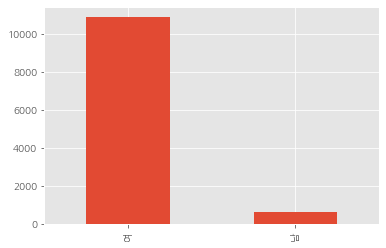

In [601]:
df_count=member["성별"].value_counts()
df_count.plot.bar()

In [602]:
member=member[member.Gold_member=='VIP']
member

,회원번호,조합원상태,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,연령대,구,...,반품횟수,총구매금액,1회평균구매금액,주별평균구매금액,첫방문일,최종방문일,미방문기간,방문주기,최대매출매장,구매증감율
235,1019647424,정상회원,수지구-동천동,여,54,미신청,수신,VIP,45 ~ 54,수지구,...,25,2991397,22158,67986,2,304,0,2.2,매장A,-0.009
381,1035466112,정상회원,수지구-풍덕천동,여,47,미신청,수신,VIP,45 ~ 54,수지구,...,0,1835504,24151,41716,9,293,11,3.7,매장C,-0.317
424,1039972480,정상회원,수지구-상현동,여,42,미신청,수신,VIP,35 ~ 44,수지구,...,4,1930231,20318,43868,10,297,7,3.0,매장C,-0.186
483,104683968,정상회원,수지구-풍덕천동,여,72,미신청,미수신,VIP,65 이상,수지구,...,11,1559345,14306,35439,4,304,0,2.8,매장C,0.307
525,1051939968,정상회원,수지구-상현동,여,46,미신청,수신,VIP,45 ~ 54,수지구,...,3,2284942,16205,51930,2,304,0,2.1,매장B,-0.148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11432,980225984,정상회원,기타-기타,여,43,미신청,수신,VIP,35 ~ 44,기타,...,7,1833343,16975,41666,3,304,0,2.8,매장C,0.033
11478,993938112,정상회원,수지구-신봉동,여,47,미신청,수신,VIP,45 ~ 54,수지구,...,6,4828759,40922,109744,7,303,1,2.5,매장D,-0.252
11480,994348288,정상회원,수지구-풍덕천동,여,32,미신청,수신,VIP,34 이하,수지구,...,0,2260752,16382,51380,4,303,1,2.2,매장C,-0.059
11500,99763712,정상회원,수지구-신봉동,여,48,미신청,수신,VIP,45 ~ 54,수지구,...,5,1853053,21057,42114,8,302,2,3.3,매장D,-0.102


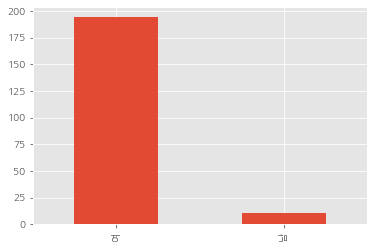

In [603]:
df_count=member["성별"].value_counts()
df_count.plot.bar()

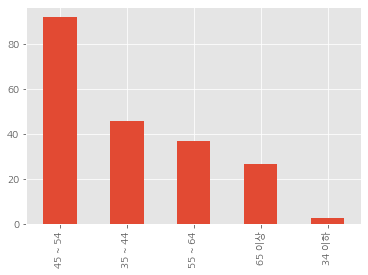

In [604]:
df_count=member["연령대"].value_counts()
df_count.plot.bar()

In [605]:
df_count

45 ~ 54    92
35 ~ 44    46
55 ~ 64    37
65 이상      27
34 이하       3
Name: 연령대, dtype: int64

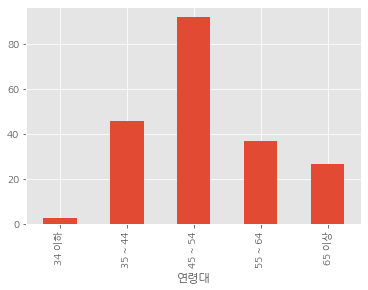

In [606]:
df_groupby_total=member.groupby(['연령대'], \
                                   as_index=False).size()

df_groupby_total.plot.bar()

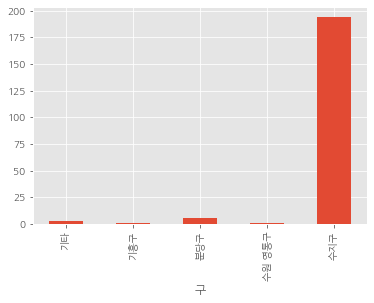

In [607]:
df_groupby_total=member.groupby(['구'], \
                                   as_index=False).size()

df_groupby_total.plot.bar()

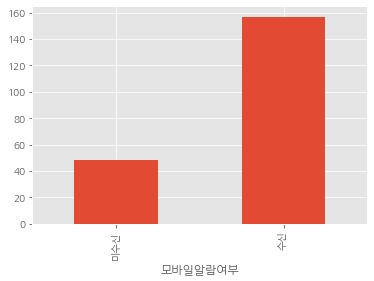

In [608]:
df_groupby_total=member.groupby(['모바일알람여부'], \
                                   as_index=False).size()

df_groupby_total.plot.bar()

In [609]:
df_groupby_total

모바일알람여부
미수신     48
수신     157
dtype: int64

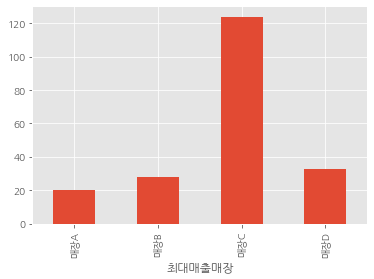

In [610]:
df_groupby_total=member.groupby(['최대매출매장'], \
                                   as_index=False).size()

df_groupby_total.plot.bar()

In [611]:
df_groupby_total

최대매출매장
매장A     20
매장B     28
매장C    124
매장D     33
dtype: int64

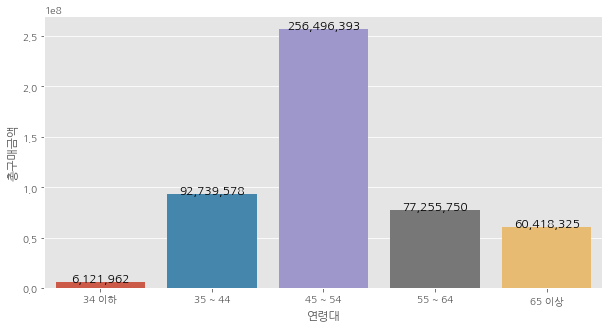

In [612]:
age_price_sum = pd.pivot_table(index='연령대', values='총구매금액', aggfunc='sum', data=member).reset_index()

plt.figure(figsize=(10,5))

ax = sns.barplot(x='연령대', y='총구매금액', data=age_price_sum, order=['34 이하', '35 ~ 44', '45 ~ 54', '55 ~ 64', '65 이상'])
for p in ax.patches:
    ax.text(s = add_comma(p.get_height()), x = p.get_x()+p.get_width()/2, y = p.get_height(), ha='center', fontsize=12)

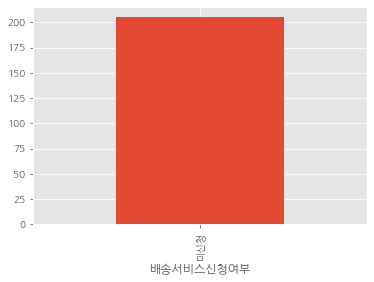

In [613]:
df_groupby_total=member.groupby(['배송서비스신청여부'], \
                                   as_index=False).size()

df_groupby_total.plot.bar()

In [614]:
member

,회원번호,조합원상태,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,연령대,구,...,반품횟수,총구매금액,1회평균구매금액,주별평균구매금액,첫방문일,최종방문일,미방문기간,방문주기,최대매출매장,구매증감율
235,1019647424,정상회원,수지구-동천동,여,54,미신청,수신,VIP,45 ~ 54,수지구,...,25,2991397,22158,67986,2,304,0,2.2,매장A,-0.009
381,1035466112,정상회원,수지구-풍덕천동,여,47,미신청,수신,VIP,45 ~ 54,수지구,...,0,1835504,24151,41716,9,293,11,3.7,매장C,-0.317
424,1039972480,정상회원,수지구-상현동,여,42,미신청,수신,VIP,35 ~ 44,수지구,...,4,1930231,20318,43868,10,297,7,3.0,매장C,-0.186
483,104683968,정상회원,수지구-풍덕천동,여,72,미신청,미수신,VIP,65 이상,수지구,...,11,1559345,14306,35439,4,304,0,2.8,매장C,0.307
525,1051939968,정상회원,수지구-상현동,여,46,미신청,수신,VIP,45 ~ 54,수지구,...,3,2284942,16205,51930,2,304,0,2.1,매장B,-0.148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11432,980225984,정상회원,기타-기타,여,43,미신청,수신,VIP,35 ~ 44,기타,...,7,1833343,16975,41666,3,304,0,2.8,매장C,0.033
11478,993938112,정상회원,수지구-신봉동,여,47,미신청,수신,VIP,45 ~ 54,수지구,...,6,4828759,40922,109744,7,303,1,2.5,매장D,-0.252
11480,994348288,정상회원,수지구-풍덕천동,여,32,미신청,수신,VIP,34 이하,수지구,...,0,2260752,16382,51380,4,303,1,2.2,매장C,-0.059
11500,99763712,정상회원,수지구-신봉동,여,48,미신청,수신,VIP,45 ~ 54,수지구,...,5,1853053,21057,42114,8,302,2,3.3,매장D,-0.102


In [628]:
mobile=member[member.모바일알람여부=='수신']
mobile_=member[member.모바일알람여부=='미수신']

In [637]:
t_result = stats.ttest_ind(mobile['구매증감율'], mobile_['구매증감율'], equal_var=True)
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

print("2-Sample t-test")
print("t 통계량 : {}".format(t))
print("p-value : {}".format(p))

#총평균, 방문횟수, 구매증감율

2-Sample t-test
t 통계량 : -3.023
p-value : 0.003


(-2, 10)

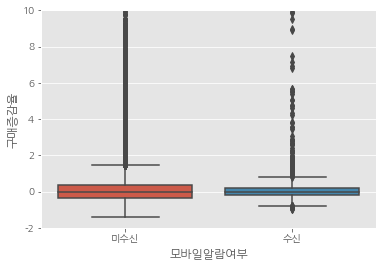

In [647]:
sns.boxplot(x='모바일알람여부',y='구매증감율', data=member)
plt.ylim([-2,10])

미수신         AxesSubplot(0.1,0.15;0.363636x0.75)
수신     AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

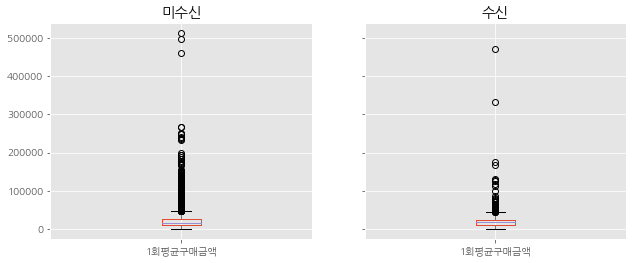

In [634]:
#member=member['VIP']

member1=member[['모바일알람여부','1회평균구매금액']]

df_raw=member1.groupby(['모바일알람여부'],as_index=False)
# (['회원번호','총구매금액','1회평균구매금액'], axis=1) 

df_raw.boxplot(figsize=(10,4))